# **Connect Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Libraries**

In [ ]:
!pip install squarify

In [ ]:
!pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 15.5 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
!pip install lifetimes
!pip install jcopml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.7 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.7-py2.py3-none-any.whl size=45916 sha256=53051c3e4d6525a81c0f0c0210a3fa1a7f31848f5f96d66126d30e1ae1e24bb9
  Stored in directory: /root/.cache/pip/wheels/1b/f0/69/8cd4944dd9637953ab744056b5faa32617cd4de449b213e886
Successfully built jcopml


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import squarify
from lifetimes.utils import summary_data_from_transaction_data
from jcopml.plot import plot_missing_value
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# from sklearnex import patch_sklearn
# patch_sklearn()
import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

In [ ]:
pd.set_option('display.max_rows', 1000)  # Mengatur jumlah maksimum baris yang akan ditampilkan
pd.set_option('display.max_columns', 100)  # Mengatur jumlah maksimum kolom yang akan ditampilkan

# **Load & Check Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/data_gabungan.csv')
df.head()

id          user_id       full_name     gender       birth  \
0  TRX554752  SC9106192006001  Hj. INAYAT ADE  perempuan  1977-01-02   
1  TRX554753  SC9106192006001  Hj. INAYAT ADE  perempuan  1977-01-02   
2  TRX554754  SC9106192006001  Hj. INAYAT ADE  perempuan  1977-01-02   
3  TRX554755  SC9106192006001  Hj. INAYAT ADE  perempuan  1977-01-02   
4  TRX554780  SC9106012011001          NURLIA  perempuan  2005-09-14   

    join_date transaction_date  product_id   product name  gross_amount  \
0  2023-10-28       2024-07-30           2  Woman Fashion       21200.0   
1  2023-10-28       2024-11-04           2  Woman Fashion        9700.0   
2  2023-10-28       2024-05-01           2  Woman Fashion       15800.0   
3  2023-10-28       2024-08-14           2  Woman Fashion       13300.0   
4  2023-11-10       2024-06-01           2  Woman Fashion      276700.0   

   discounts  money_spent   refund  wallet_balance  kode kecamatan  \
0        NaN     620000.0  20000.0       -230000.0          910619   
1        NaN     620000.0  20000.0       -230000.0          910619   
2        NaN     620000.0  20000.0       -230000.0          910619   
3        NaN     620000.0  20000.0       -230000.0          910619   
4        NaN    1910000.0  80000.0        940000.0          910601   

    nama kecamatan  kode kabupaten nama kabupaten  kode provinsi nama provinsi  
0  AIMANDO PADAIDO            9106    BIAK NUMFOR             91     P A P U A  
1  AIMANDO PADAIDO            9106    BIAK NUMFOR             91     P A P U A  
2  AIMANDO PADAIDO            9106    BIAK NUMFOR             91     P A P U A  
3  AIMANDO PADAIDO            9106    BIAK NUMFOR             91     P A P U A  
4        BIAK KOTA            9106    BIAK NUMFOR             91     P A P U A

Terlihat ada NaN pada discounts, dan negatif value pada wallet_balance. Maka perlu di analisis lebih lanjut untuk melihat dan check keseluruhan data.

In [ ]:
df.shape

(2778163, 20)

Data terdiri dari 2778163 baris dan 20 kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2778163 entries, 0 to 2778162
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                object 
 1   user_id           object 
 2   full_name         object 
 3   gender            object 
 4   birth             object 
 5   join_date         object 
 6   transaction_date  object 
 7   product_id        int64  
 8   product name      object 
 9   gross_amount      float64
 10  discounts         float64
 11  money_spent       float64
 12  refund            float64
 13  wallet_balance    float64
 14  kode kecamatan    int64  
 15  nama kecamatan    object 
 16  kode kabupaten    int64  
 17  nama kabupaten    object 
 18  kode provinsi     int64  
 19  nama provinsi     object 
dtypes: float64(5), int64(4), object(11)
memory usage: 423.9+ MB


Type data terdiri dari object, integer, dan float. Pada kolom birth, joint_date, transaction_date bertipe object namun seharusnya datetime. Maka kita harus merubah tipe tersebut menjadi datetime

**Mengubah tipe data birth, join_date, dan transaction_date menjadi datetime dan product_id, kode_provinsi menjadi object**

In [ ]:
#Mengubah tipe data agar sesuai
df['product_id'] = df['product_id'].astype('object')
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['join_date'] = pd.to_datetime(df['join_date'])
df['birth'] = pd.to_datetime(df['birth'])
df['kode provinsi'] = df['kode provinsi'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2778163 entries, 0 to 2778162
Data columns (total 20 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                object        
 1   user_id           object        
 2   full_name         object        
 3   gender            object        
 4   birth             datetime64[ns]
 5   join_date         datetime64[ns]
 6   transaction_date  datetime64[ns]
 7   product_id        object        
 8   product name      object        
 9   gross_amount      float64       
 10  discounts         float64       
 11  money_spent       float64       
 12  refund            float64       
 13  wallet_balance    float64       
 14  kode kecamatan    int64         
 15  nama kecamatan    object        
 16  kode kabupaten    int64         
 17  nama kabupaten    object        
 18  kode provinsi     object        
 19  nama provinsi     object        
dtypes: datetime64[ns](3), float64(5), int64(2), ob

berhasil mengubah tipe data pada kolom birth, joint_date, transaction_date, product_id dan kode provinsi

**mengubah nama kolom untuk mempermudah pemrosesan data**

In [ ]:
df.rename(columns={'id' : 'trx_id', 'product name': 'product_name', 'kode kecamatan' : 'kode_kecamatan',
                              'nama kecamatan' : 'nama_kecamatan', 'kode kabupaten' : 'kode_kabupaten',
                              'nama kabupaten' : 'nama_kabupaten', 'kode provinsi' : 'kode_provinsi',
                              'nama provinsi' : 'nama_provinsi'}, inplace=True)

#cek ulang info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2778163 entries, 0 to 2778162
Data columns (total 20 columns):
 #   Column            Dtype         
---  ------            -----         
 0   trx_id            object        
 1   user_id           object        
 2   full_name         object        
 3   gender            object        
 4   birth             datetime64[ns]
 5   join_date         datetime64[ns]
 6   transaction_date  datetime64[ns]
 7   product_id        object        
 8   product_name      object        
 9   gross_amount      float64       
 10  discounts         float64       
 11  money_spent       float64       
 12  refund            float64       
 13  wallet_balance    float64       
 14  kode_kecamatan    int64         
 15  nama_kecamatan    object        
 16  kode_kabupaten    int64         
 17  nama_kabupaten    object        
 18  kode_provinsi     object        
 19  nama_provinsi     object        
dtypes: datetime64[ns](3), float64(5), int64(2), ob

Berhasil mengubah nama kolom

In [ ]:
df.describe().transpose()

count                           mean  \
birth               2778163  1989-04-16 07:05:48.921643648   
join_date           2778163  2023-11-17 08:13:55.918123264   
transaction_date    2778163  2024-07-01 02:48:41.735261184   
gross_amount      2762183.0                   56814.381958   
discounts          837943.0                    29674.23357   
money_spent       2778163.0                 1786418.997013   
refund            2778163.0                   577400.13095   
wallet_balance    2778163.0                  610844.885631   
kode_kecamatan    2778163.0                  283311.723454   
kode_kabupaten    2778163.0                    2833.021938   

                                  min                  25%  \
birth             1959-01-01 00:00:00  1982-01-08 00:00:00   
join_date         2023-10-01 00:00:00  2023-10-24 00:00:00   
transaction_date  2024-01-01 00:00:00  2024-04-01 00:00:00   
gross_amount                   -100.0               6400.0   
discounts                      -100.0               8300.0   
money_spent                       0.0            1570000.0   
refund                    -16500000.0             100000.0   
wallet_balance            -15870000.0             440000.0   
kode_kecamatan               110101.0             330105.0   
kode_kabupaten                 1101.0               3301.0   

                                  50%                  75%  \
birth             1989-07-18 00:00:00  1997-02-03 00:00:00   
join_date         2023-11-17 00:00:00  2023-12-10 00:00:00   
transaction_date  2024-06-30 00:00:00  2024-10-01 00:00:00   
gross_amount                  20800.0              64400.0   
discounts                     16600.0              36600.0   
money_spent                 1810000.0            2030000.0   
refund                       170000.0             250000.0   
wallet_balance               590000.0             770000.0   
kode_kecamatan               331005.0             332108.0   
kode_kabupaten                 3310.0               3321.0   

                                  max               std  
birth             2007-12-28 00:00:00               NaN  
join_date         2024-12-28 00:00:00               NaN  
transaction_date  2024-12-31 00:00:00               NaN  
gross_amount                2761300.0      96733.222548  
discounts                   1571300.0      40788.237542  
money_spent                18740000.0     370958.645555  
refund             27271120000.000004  103478147.941318  
wallet_balance             11150000.0     351520.744601  
kode_kecamatan               917105.0      99979.759684  
kode_kabupaten                 9171.0        999.796931

Terlihat banyak sekali negative value pada beberapa kolom, maka perlu dicheck berapa banyak yang terdapat negative value tersebut.

# **Data Preprocessing**

## **Missing Value**

### **Cek Missing Value**

In [ ]:
df.isnull().sum()

trx_id                    0
user_id                   0
full_name                 0
gender                    0
birth                     0
join_date                 0
transaction_date          0
product_id                0
product_name              0
gross_amount          15980
discounts           1940220
money_spent               0
refund                    0
wallet_balance            0
kode_kecamatan            0
nama_kecamatan            0
kode_kabupaten            0
nama_kabupaten            0
kode_provinsi             0
nama_provinsi             0
dtype: int64

missing_value      %
trx_id                        0   0.00
user_id                       0   0.00
full_name                     0   0.00
gender                        0   0.00
birth                         0   0.00
join_date                     0   0.00
transaction_date              0   0.00
product_id                    0   0.00
product_name                  0   0.00
gross_amount              15980   0.58
discounts               1940220  69.84
money_spent                   0   0.00
refund                        0   0.00
wallet_balance                0   0.00
kode_kecamatan                0   0.00
nama_kecamatan                0   0.00
kode_kabupaten                0   0.00
nama_kabupaten                0   0.00
kode_provinsi                 0   0.00
nama_provinsi                 0   0.00

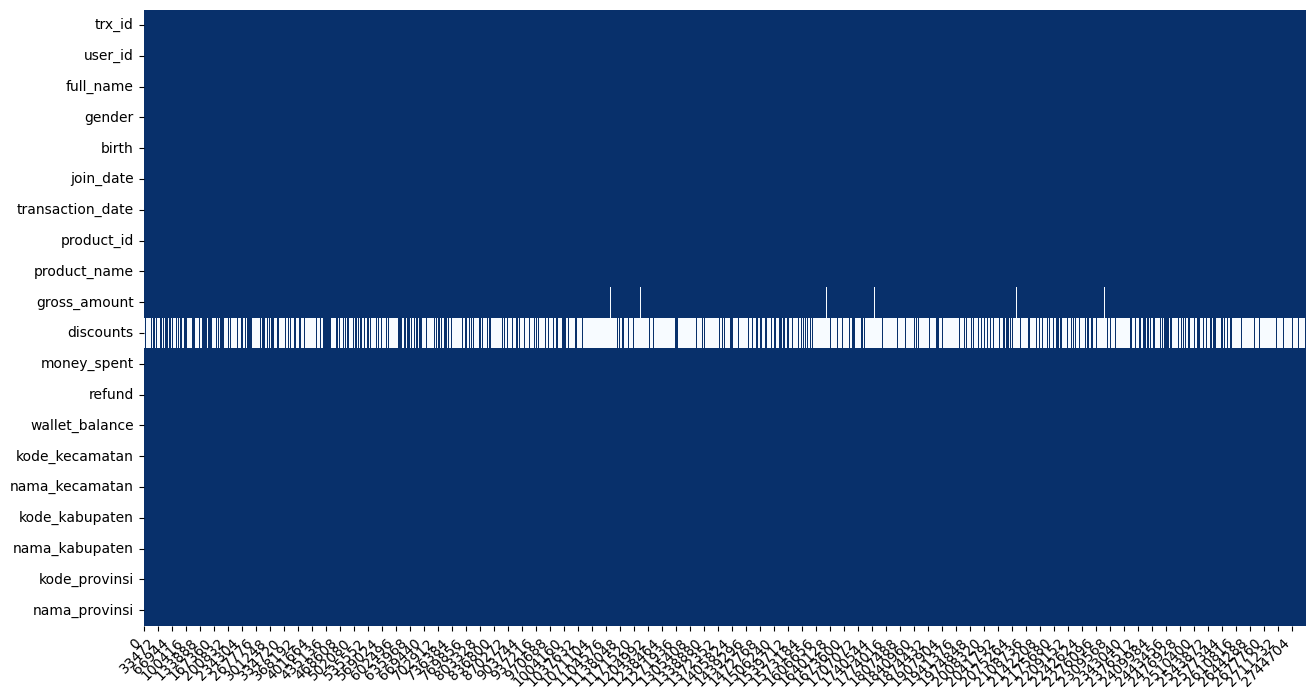

In [ ]:
plot_missing_value(df, return_df = True)

Terdapat missing value pada gross_amount sebesar 0,58% maka akan dilakukan drop saja karna hanya sedikit. Dan discount sebesar 69,84% (sangat besar >50%) maka dari itu akan di handle dengan diisi value 0.

### **Handle Missing Value**

**Handling missing value discounts**

In [ ]:
df['discounts'].fillna(0, inplace=True)

#cek kembali missing value
df.isnull().sum()

trx_id                  0
user_id                 0
full_name               0
gender                  0
birth                   0
join_date               0
transaction_date        0
product_id              0
product_name            0
gross_amount        15980
discounts               0
money_spent             0
refund                  0
wallet_balance          0
kode_kecamatan          0
nama_kecamatan          0
kode_kabupaten          0
nama_kabupaten          0
kode_provinsi           0
nama_provinsi           0
dtype: int64

In [ ]:
df.shape

(2778163, 20)

**Handling missing value gross_amount**

In [ ]:
df.dropna(inplace=True)

#cek kembali missing value
df.isnull().sum()

trx_id              0
user_id             0
full_name           0
gender              0
birth               0
join_date           0
transaction_date    0
product_id          0
product_name        0
gross_amount        0
discounts           0
money_spent         0
refund              0
wallet_balance      0
kode_kecamatan      0
nama_kecamatan      0
kode_kabupaten      0
nama_kabupaten      0
kode_provinsi       0
nama_provinsi       0
dtype: int64

In [ ]:
df.shape

(2762183, 20)

Setelah dilakukan handle missing value dengan mendrop NA pada kolomm gross_amount, sekarang data terdiri dari 2762183 baris dan 20 kolom

## **Duplicated Value**

### **Cek Duplicated Value**

In [ ]:
df.duplicated().sum()

0

Tidak terdapat duplicated value, maka dapat dilanjut ke analisis selanjutnya.

## **Negative Value**

### **Cek Negative Value**

In [ ]:
columns = ['gross_amount', 'discounts', 'money_spent', 'refund', 'wallet_balance']

total_rows = len(df)

for feature in columns:
    count_negatives = sum(df[feature] < 0)
    percentage_negatives = (count_negatives / total_rows) * 100
    print(f"{feature}: {count_negatives} ({percentage_negatives:.2f}%)")

gross_amount: 202 (0.01%)
discounts: 202 (0.01%)
money_spent: 0 (0.00%)
refund: 4475 (0.16%)
wallet_balance: 17937 (0.65%)


dikarenakan yang terdapat negative value pada kolom-kolom tersebut sedikit maka akan kita drop saja.

### **Handle Negative Value**

**Drop negative value**

In [ ]:
df = df.drop(df[(df[columns] < 0).any(axis=1)].index)

In [ ]:
columns = ['gross_amount', 'discounts', 'money_spent', 'refund', 'wallet_balance']

for feature in columns:
    zero_rows = df.loc[df[feature] == 0]
    zero_percent = (len(zero_rows) / len(df)) * 100
    print(f"Persentase baris dengan nilai 0 pada fitur {feature}: {zero_percent:.2f}%")

Persentase baris dengan nilai 0 pada fitur gross_amount: 0.00%
Persentase baris dengan nilai 0 pada fitur discounts: 69.65%
Persentase baris dengan nilai 0 pada fitur money_spent: 0.38%
Persentase baris dengan nilai 0 pada fitur refund: 0.73%
Persentase baris dengan nilai 0 pada fitur wallet_balance: 0.09%


**Buang value yang memiliki value 0 pada kolom money_spent, refund, wallet_balance**

In [ ]:
df = df[df['money_spent']>0]
df = df[df['refund']>0]
df = df[df['wallet_balance']>0]
df.head()

trx_id          user_id  full_name     gender      birth  join_date  \
4  TRX554780  SC9106012011001     NURLIA  perempuan 2005-09-14 2023-11-10   
5  TRX554781  SC9106012011001     NURLIA  perempuan 2005-09-14 2023-11-10   
6  TRX554823  SC9106012017001  IIS HARUN  perempuan 1965-08-10 2023-11-28   
7  TRX554824  SC9106012017001  IIS HARUN  perempuan 1965-08-10 2023-11-28   
8  TRX554825  SC9106012017001  IIS HARUN  perempuan 1965-08-10 2023-11-28   

  transaction_date product_id   product_name  gross_amount  discounts  \
4       2024-06-01          2  Woman Fashion      276700.0        0.0   
5       2024-09-27          2  Woman Fashion       23300.0        0.0   
6       2024-05-27          2  Woman Fashion      147100.0        0.0   
7       2024-08-21          2  Woman Fashion       72700.0        0.0   
8       2024-10-30          2  Woman Fashion      122200.0    30500.0   

   money_spent   refund  wallet_balance  kode_kecamatan nama_kecamatan  \
4    1910000.0  80000.0        940000.0          910601      BIAK KOTA   
5    1910000.0  80000.0        940000.0          910601      BIAK KOTA   
6    2420000.0  20000.0        460000.0          910601      BIAK KOTA   
7    2420000.0  20000.0        460000.0          910601      BIAK KOTA   
8    2420000.0  20000.0        460000.0          910601      BIAK KOTA   

   kode_kabupaten nama_kabupaten kode_provinsi nama_provinsi  
4            9106    BIAK NUMFOR            91     P A P U A  
5            9106    BIAK NUMFOR            91     P A P U A  
6            9106    BIAK NUMFOR            91     P A P U A  
7            9106    BIAK NUMFOR            91     P A P U A  
8            9106    BIAK NUMFOR            91     P A P U A

In [ ]:
df.describe().transpose()

count                           mean  \
birth               2716869  1989-04-19 11:49:31.685568256   
join_date           2716869  2023-11-16 11:49:25.325307392   
transaction_date    2716869  2024-07-01 02:39:43.007499008   
gross_amount      2716869.0                   56716.254151   
discounts         2716869.0                    9031.001163   
money_spent       2716869.0                 1792839.301416   
refund            2716869.0                  590056.874292   
wallet_balance    2716869.0                  618589.689087   
kode_kecamatan    2716869.0                  283758.938093   
kode_kabupaten    2716869.0                    2837.494058   

                                  min                  25%  \
birth             1959-01-01 00:00:00  1982-01-09 00:00:00   
join_date         2023-10-01 00:00:00  2023-10-24 00:00:00   
transaction_date  2024-01-01 00:00:00  2024-04-01 00:00:00   
gross_amount                      0.0               6400.0   
discounts                         0.0                  0.0   
money_spent                   10000.0            1570000.0   
refund                        10000.0             100000.0   
wallet_balance                10000.0             440000.0   
kode_kecamatan               110101.0             330106.0   
kode_kabupaten                 1101.0               3301.0   

                                  50%                  75%  \
birth             1989-07-23 00:00:00  1997-02-07 00:00:00   
join_date         2023-11-17 00:00:00  2023-12-10 00:00:00   
transaction_date  2024-06-30 00:00:00  2024-10-01 00:00:00   
gross_amount                  20800.0              64500.0   
discounts                         0.0               6000.0   
money_spent                 1820000.0            2040000.0   
refund                       170000.0             250000.0   
wallet_balance               590000.0             770000.0   
kode_kecamatan               331006.0             332109.0   
kode_kabupaten                 3310.0               3321.0   

                                  max               std  
birth             2007-12-28 00:00:00               NaN  
join_date         2023-12-31 00:00:00               NaN  
transaction_date  2024-12-31 00:00:00               NaN  
gross_amount                2761300.0      96246.925621  
discounts                   1571300.0      26280.682016  
money_spent                 2930000.0     342486.301619  
refund             27271120000.000004  104638816.729156  
wallet_balance             11150000.0      282268.30116  
kode_kecamatan               917105.0      98221.223472  
kode_kabupaten                 9171.0        982.211573

In [ ]:
df.shape

(2716869, 20)

## **Outlier**

### **Cek Outlier**

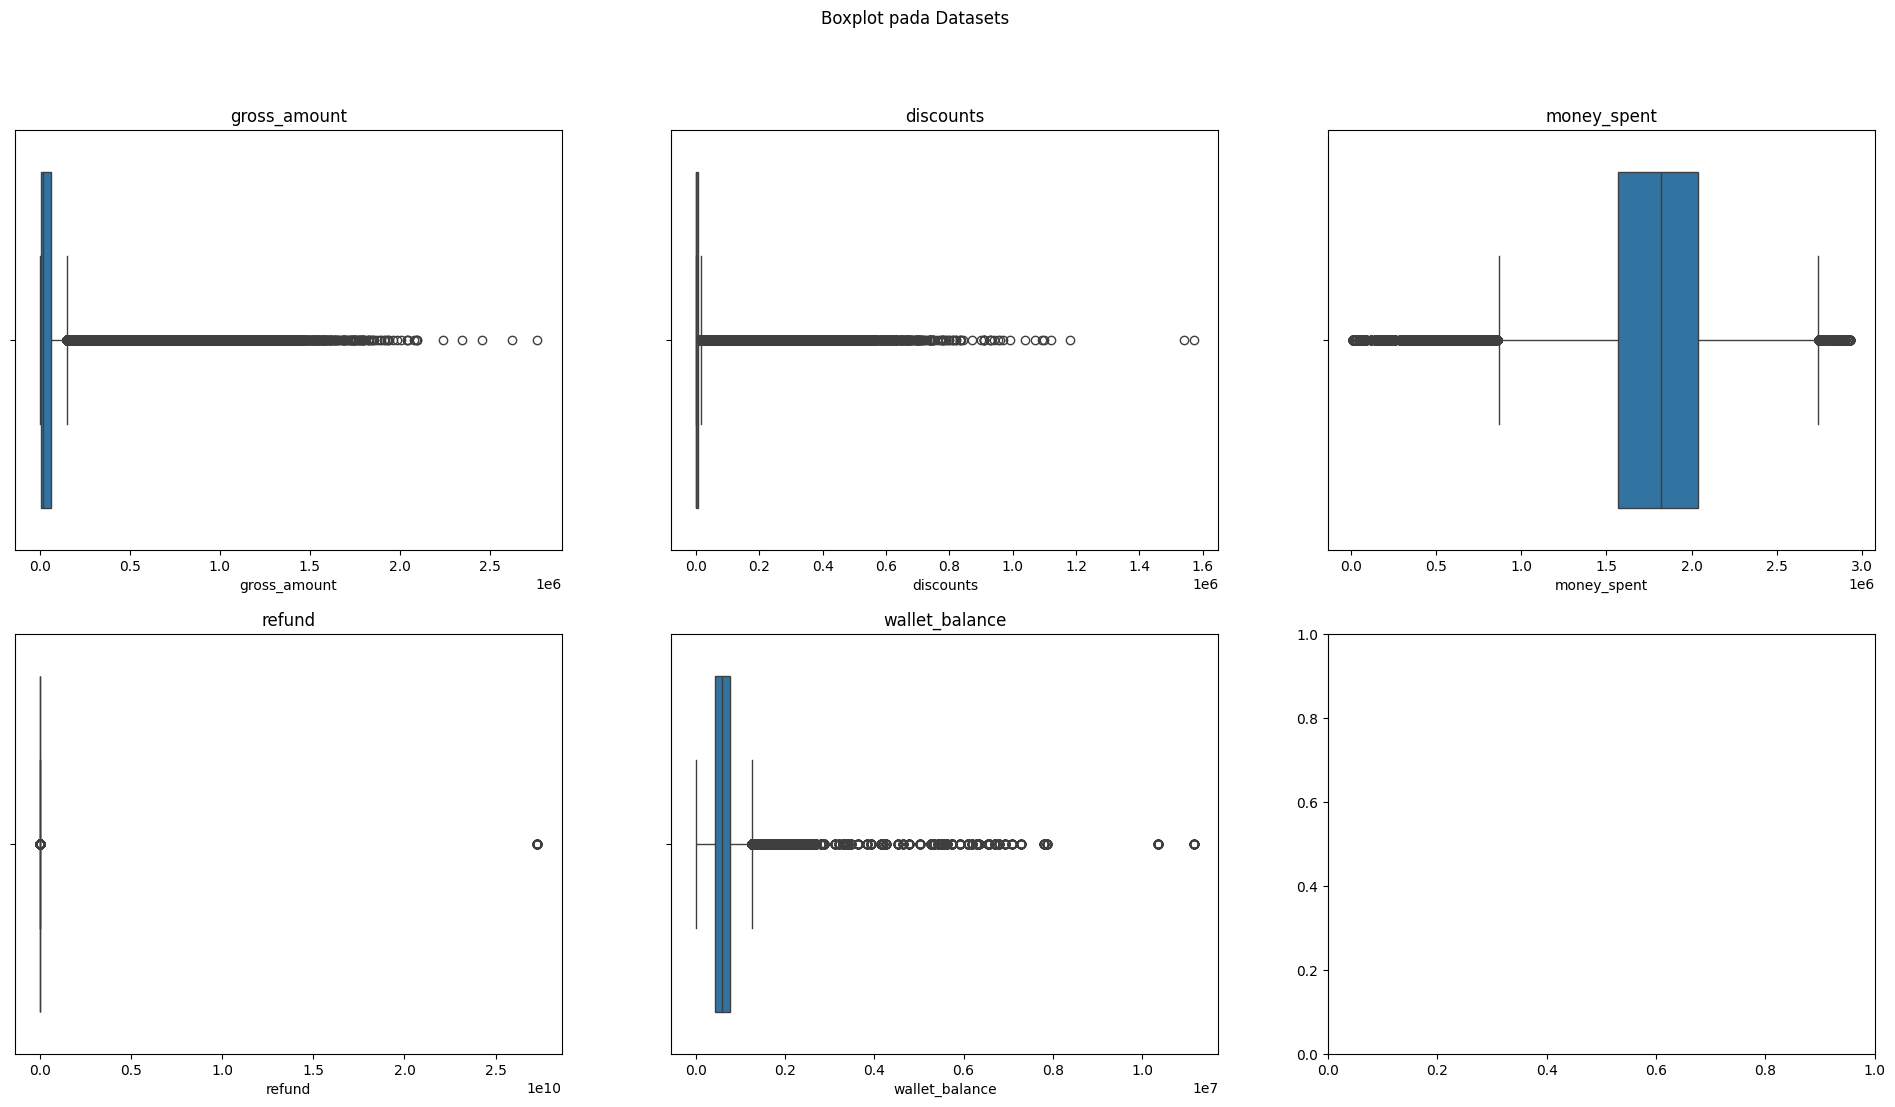

In [ ]:
# Daftar kolom numerik yang ingin dicek outliers
numerical_cols = ['gross_amount', 'discounts', 'money_spent', 'refund', 'wallet_balance']

# Menentukan ukuran dan judul plot
fig, axs = plt.subplots(2, 3, figsize=(24, 12))
fig.suptitle('Boxplot pada Datasets')

# Membuat boxplot untuk setiap kolom numerik
for col, ax in zip(numerical_cols, axs.flatten()):
     sns.boxplot(x=df[col], ax=ax)
     ax.set_title(col)

plt.show()

berdasarkan plot terdapat lumayan banyak outlier (jauh dari kumpulan datanya) dan akan di handling menggunakan IQR

In [ ]:
# Fungsi untuk menghitung outlier menggunakan kriteria IQR
def count_outliers_using_IQR(feature_name):
    # IQR
    Q1 = np.percentile(df[feature_name], 25, interpolation = 'midpoint')
    Q3 = np.percentile(df[feature_name], 75, interpolation = 'midpoint')

    IQR = Q3 - Q1

    # Above Upper bound
    upper = df[feature_name] >= (Q3 + 1.5 * IQR)
    # Below Lower bound
    lower = df[feature_name] <= (Q1 - 1.5 * IQR)

    print(feature_name, " : ", len(np.where(upper)[0]) + len(np.where(lower)[0]))


# Mencetak jumlah outlier sesuai feature yang ada pada variabel numerical_cols
print("jumlah outlier : \n")

for feature in numerical_cols:
    count_outliers_using_IQR(feature)

jumlah outlier : 

gross_amount  :  268741
discounts  :  433054
money_spent  :  22470


<ipython-input-27-99780186bff1>:21: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)



refund  :  63303
wallet_balance  :  36877


In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus outlier
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

for column in numerical_cols:
    df = remove_outliers_iqr(df, column)

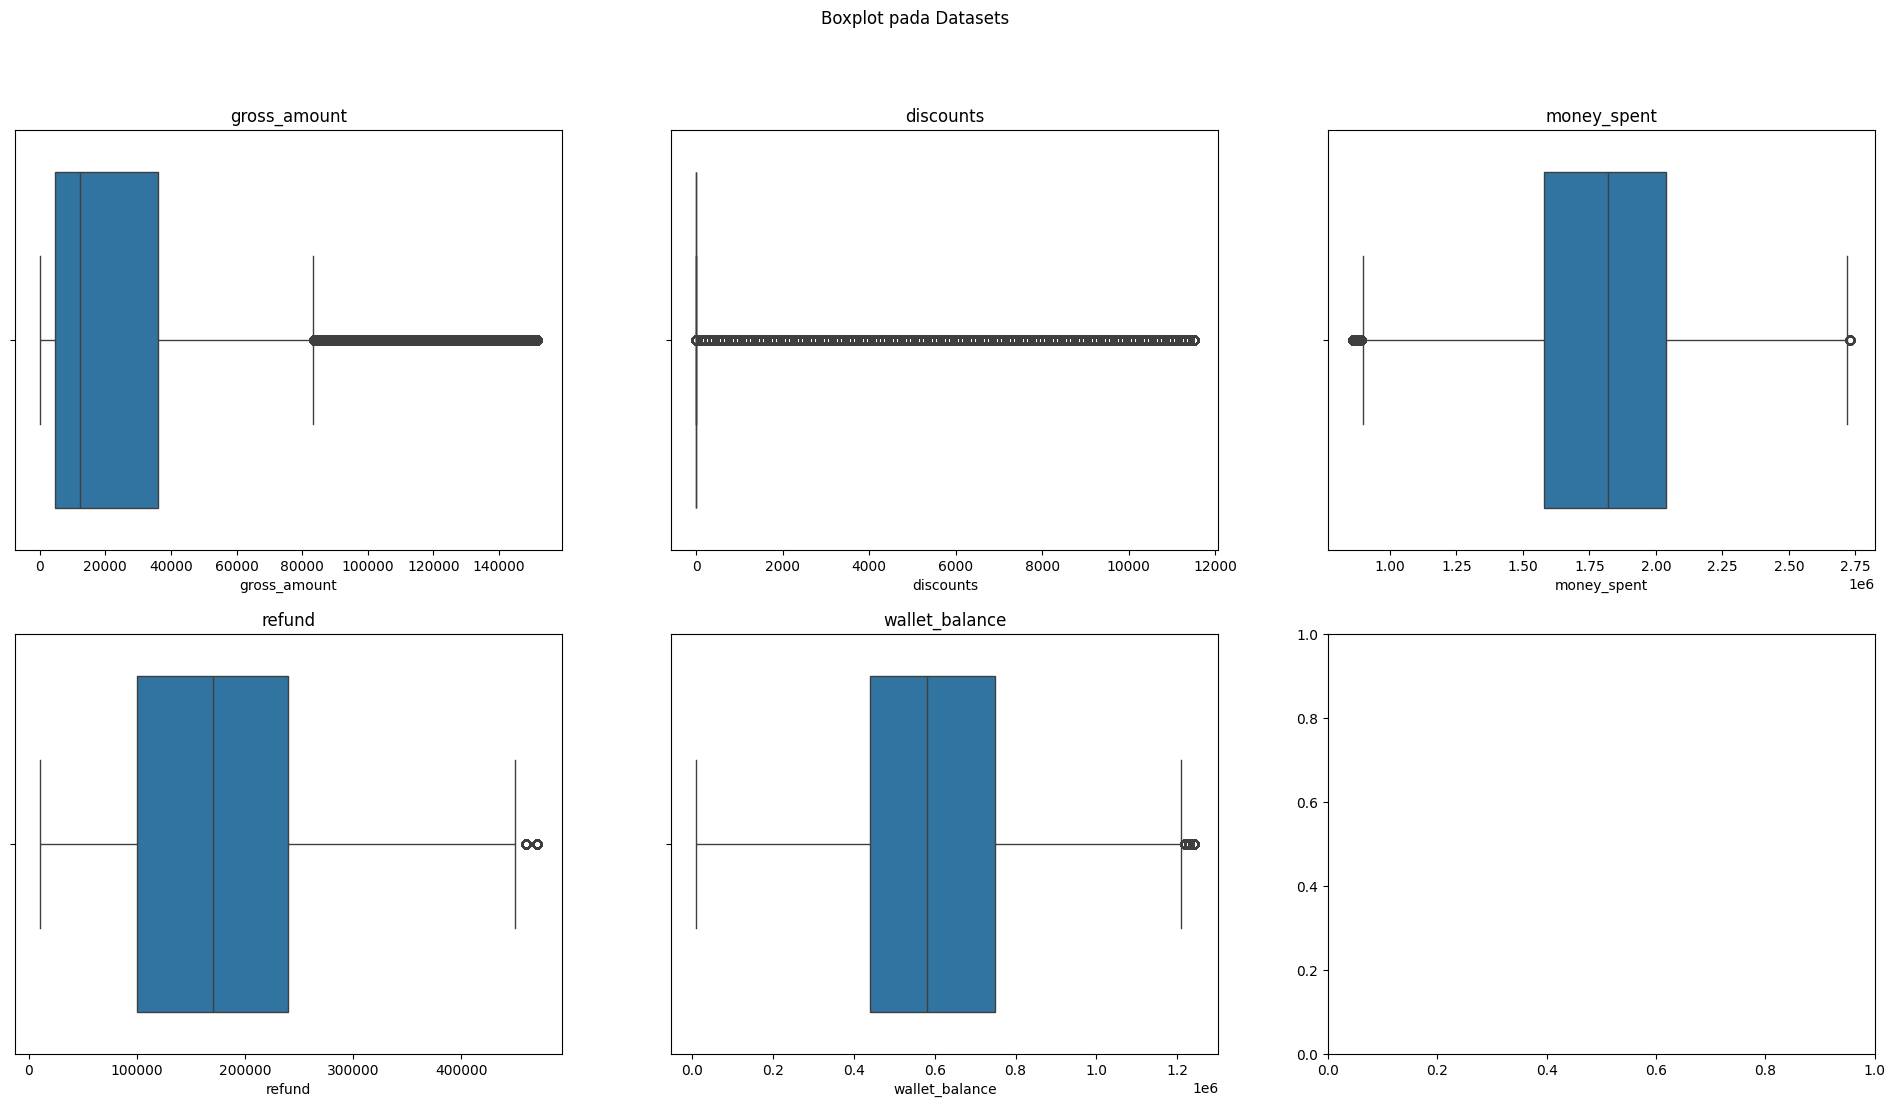

In [ ]:
#melihat kembali outlier setelah di handling dengan visualisasi boxplot
#Daftar kolom numerik yang ingin dicek outliers
numerical_cols = ['gross_amount', 'discounts', 'money_spent', 'refund', 'wallet_balance']

# Menentukan ukuran dan judul plot
fig, axs = plt.subplots(2, 3, figsize=(24, 12))
fig.suptitle('Boxplot pada Datasets')

#Membuat boxplot untuk setiap kolom numerik
for col, ax in zip(numerical_cols, axs.flatten()):
     sns.boxplot(x=df[col], ax=ax)
     ax.set_title(col)

plt.show()

In [ ]:
df.shape

(1984735, 20)

In [ ]:
df.describe().T

count                           mean  \
birth               1984735  1989-04-14 08:19:10.891378560   
join_date           1984735  2023-11-16 10:58:22.957524224   
transaction_date    1984735  2024-07-01 01:37:07.489513216   
gross_amount      1984735.0                   26853.279002   
discounts         1984735.0                    1084.462409   
money_spent       1984735.0                 1799903.528683   
refund            1984735.0                  177515.451685   
wallet_balance    1984735.0                  597506.301849   
kode_kecamatan    1984735.0                  281429.035523   
kode_kabupaten    1984735.0                    2814.195192   

                                  min                  25%  \
birth             1959-01-01 00:00:00  1982-01-08 00:00:00   
join_date         2023-10-01 00:00:00  2023-10-24 00:00:00   
transaction_date  2024-01-01 00:00:00  2024-03-31 00:00:00   
gross_amount                      0.0               4700.0   
discounts                         0.0                  0.0   
money_spent                  860000.0            1580000.0   
refund                        10000.0             100000.0   
wallet_balance                10000.0             440000.0   
kode_kecamatan               110101.0             330102.0   
kode_kabupaten                 1101.0               3301.0   

                                  50%                  75%  \
birth             1989-07-12 00:00:00  1997-02-03 00:00:00   
join_date         2023-11-17 00:00:00  2023-12-10 00:00:00   
transaction_date  2024-06-30 00:00:00  2024-09-30 00:00:00   
gross_amount                  12300.0              36200.0   
discounts                         0.0                  0.0   
money_spent                 1820000.0            2040000.0   
refund                       170000.0             240000.0   
wallet_balance               580000.0             750000.0   
kode_kecamatan               330920.0             332103.0   
kode_kabupaten                 3309.0               3321.0   

                                  max            std  
birth             2007-12-28 00:00:00            NaN  
join_date         2023-12-31 00:00:00            NaN  
transaction_date  2024-12-31 00:00:00            NaN  
gross_amount                 151600.0    32842.09934  
discounts                     11500.0    2771.537128  
money_spent                 2730000.0  329765.277973  
refund                       470000.0  100936.889393  
wallet_balance              1240000.0  231106.515929  
kode_kecamatan               917105.0   99278.038491  
kode_kabupaten                 9171.0     992.779223

# **Exploratory Data Analysis**

## **Jumlah Pelanggan**

**Jumlah pelanggan per provinsi**

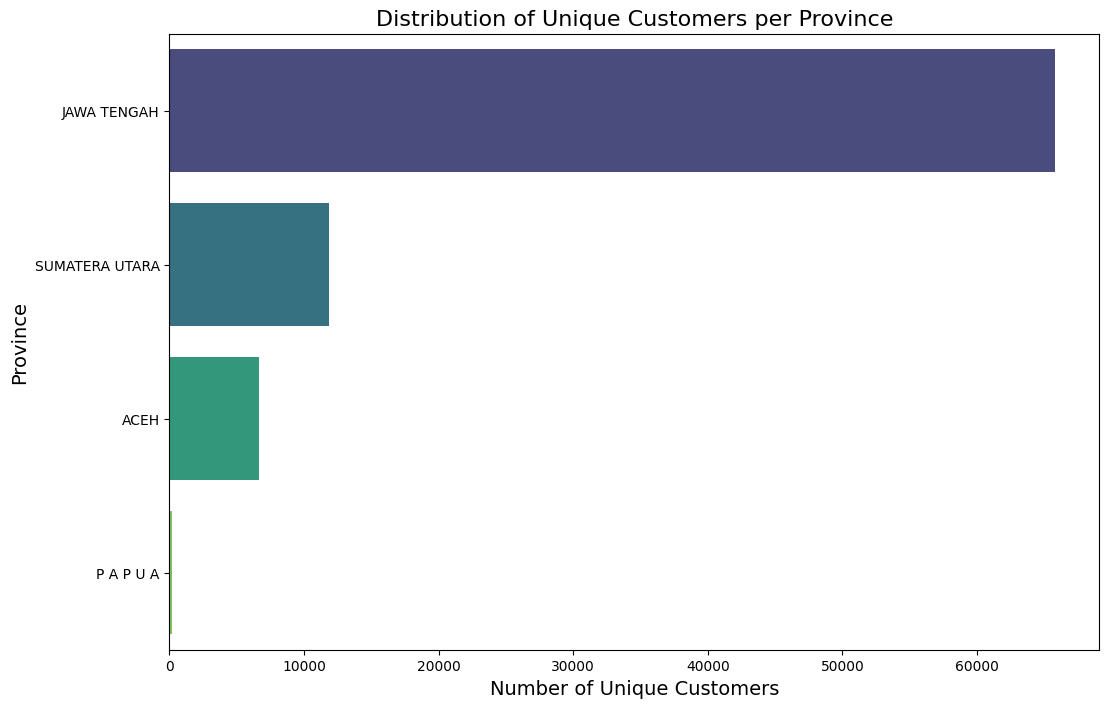

In [ ]:
customer_num = df.groupby("nama_provinsi")['user_id'].nunique().sort_values(ascending=False)

# Plotting the distribution of unique customers per province
plt.figure(figsize=(12, 8))
sns.barplot(x=customer_num.values, y=customer_num.index, palette="viridis")

# Adding titles and labels
plt.title('Distribution of Unique Customers per Province', fontsize=16)
plt.xlabel('Number of Unique Customers', fontsize=14)
plt.ylabel('Province', fontsize=14)

# Display the plot
plt.show()

In [ ]:
customer_num = df.groupby("nama_provinsi")['user_id'].nunique().sort_values(ascending=False)
customer_num

nama_provinsi
JAWA TENGAH       65799
SUMATERA UTARA    11893
ACEH               6636
P A P U A           203
Name: user_id, dtype: int64

Jumlah pelanggan terbanyak terdapat di provinsi Jawa Tengah dan sedikit terdapat di provinsi Papua

**Jumlah pelanggan per provinsi di jateng**

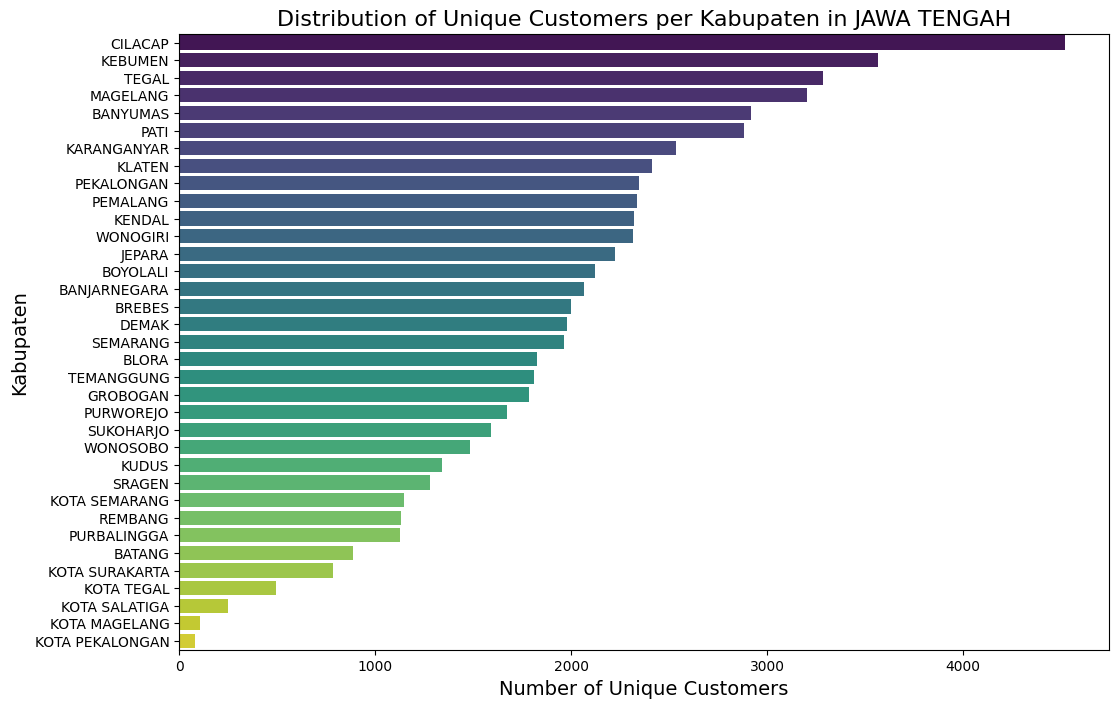

In [ ]:
provinsi_tertentu = 'JAWA TENGAH'
df_provinsi_tertentu = df[df['nama_provinsi'] == provinsi_tertentu]

# Hitung jumlah pelanggan per kabupaten
customer_num_per_kabupaten = df_provinsi_tertentu.groupby("nama_kabupaten")['user_id'].nunique().sort_values(ascending=False)

# Plotting the distribution of unique customers per kabupaten in JAWA TENGAH
plt.figure(figsize=(12, 8))
sns.barplot(x=customer_num_per_kabupaten.values, y=customer_num_per_kabupaten.index, palette="viridis")

# Adding titles and labels
plt.title('Distribution of Unique Customers per Kabupaten in JAWA TENGAH', fontsize=16)
plt.xlabel('Number of Unique Customers', fontsize=14)
plt.ylabel('Kabupaten', fontsize=14)

# Display the plot
plt.show()

In [ ]:
provinsi_tertentu = 'JAWA TENGAH'
df_provinsi_tertentu = df[df['nama_provinsi'] == provinsi_tertentu]

#Hitung jumlah pelanggan per kabupaten
customer_num_per_kabupaten = df_provinsi_tertentu.groupby("nama_kabupaten")['user_id'].nunique().sort_values(ascending=False)

customer_num_per_kabupaten

nama_kabupaten
CILACAP            4520
KEBUMEN            3568
TEGAL              3284
MAGELANG           3206
BANYUMAS           2916
PATI               2884
KARANGANYAR        2533
KLATEN             2412
PEKALONGAN         2346
PEMALANG           2335
KENDAL             2321
WONOGIRI           2317
JEPARA             2222
BOYOLALI           2124
BANJARNEGARA       2065
BREBES             2000
DEMAK              1977
SEMARANG           1964
BLORA              1826
TEMANGGUNG         1812
GROBOGAN           1784
PURWOREJO          1673
SUKOHARJO          1590
WONOSOBO           1484
KUDUS              1342
SRAGEN             1281
KOTA SEMARANG      1148
REMBANG            1131
PURBALINGGA        1128
BATANG              888
KOTA SURAKARTA      787
KOTA TEGAL          493
KOTA SALATIGA       250
KOTA MAGELANG       108
KOTA PEKALONGAN      80
Name: user_id, dtype: int64

Jumlah pelanggan terbanyak di provinsi jawa tengah terdapat di kabupaten cilacap dan sedikit terdapat di kota pekalongan

**Jumlah pelanggan per provinsi di sumut**

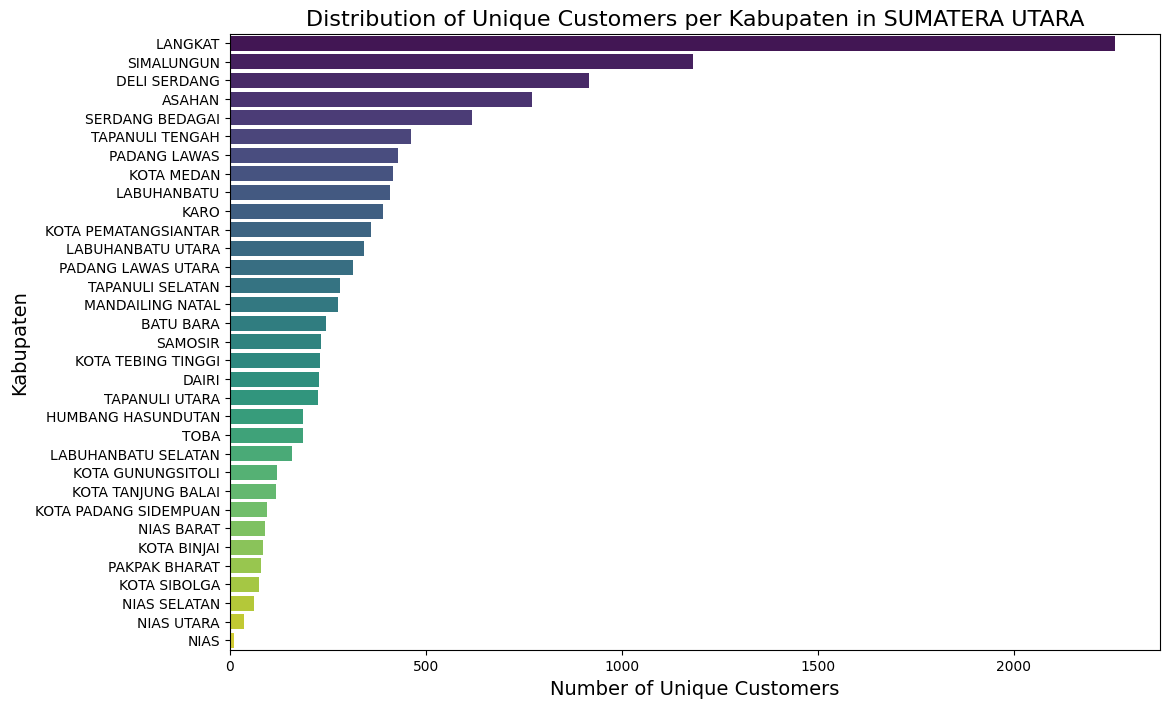

In [ ]:
provinsi_tertentu = 'SUMATERA UTARA'
df_provinsi_tertentu = df[df['nama_provinsi'] == provinsi_tertentu]

#Hitung jumlah pelanggan per kabupaten
customer_num_per_kabupaten = df_provinsi_tertentu.groupby("nama_kabupaten")['user_id'].nunique().sort_values(ascending=False)

# Plotting the distribution of unique customers per kabupaten in SUMATERA UTARA
plt.figure(figsize=(12, 8))
sns.barplot(x=customer_num_per_kabupaten.values, y=customer_num_per_kabupaten.index, palette="viridis")

# Adding titles and labels
plt.title('Distribution of Unique Customers per Kabupaten in SUMATERA UTARA', fontsize=16)
plt.xlabel('Number of Unique Customers', fontsize=14)
plt.ylabel('Kabupaten', fontsize=14)

# Display the plot
plt.show()

In [ ]:
provinsi_tertentu = 'SUMATERA UTARA'
df_provinsi_tertentu = df[df['nama_provinsi'] == provinsi_tertentu]

#Hitung jumlah pelanggan per kabupaten
customer_num_per_kabupaten = df_provinsi_tertentu.groupby("nama_kabupaten")['user_id'].nunique().sort_values(ascending=False)

customer_num_per_kabupaten

nama_kabupaten
LANGKAT                  2259
SIMALUNGUN               1181
DELI SERDANG              917
ASAHAN                    772
SERDANG BEDAGAI           619
TAPANULI TENGAH           462
PADANG LAWAS              430
KOTA MEDAN                416
LABUHANBATU               409
KARO                      392
KOTA PEMATANGSIANTAR      361
LABUHANBATU UTARA         342
PADANG LAWAS UTARA        315
TAPANULI SELATAN          281
MANDAILING NATAL          276
BATU BARA                 245
SAMOSIR                   232
KOTA TEBING TINGGI        230
DAIRI                     228
TAPANULI UTARA            224
HUMBANG HASUNDUTAN        188
TOBA                      186
LABUHANBATU SELATAN       158
KOTA GUNUNGSITOLI         121
KOTA TANJUNG BALAI        119
KOTA PADANG SIDEMPUAN      94
NIAS BARAT                 90
KOTA BINJAI                85
PAKPAK BHARAT              80
KOTA SIBOLGA               74
NIAS SELATAN               62
NIAS UTARA                 35
NIAS                     

Jumlah pelanggan terbanyak di provinsi Sumatera Utara terdapat di kabupaten Langkat dan sedikit di kabupaten Nias

**Jumlah pelanggan per provinsi di aceh**

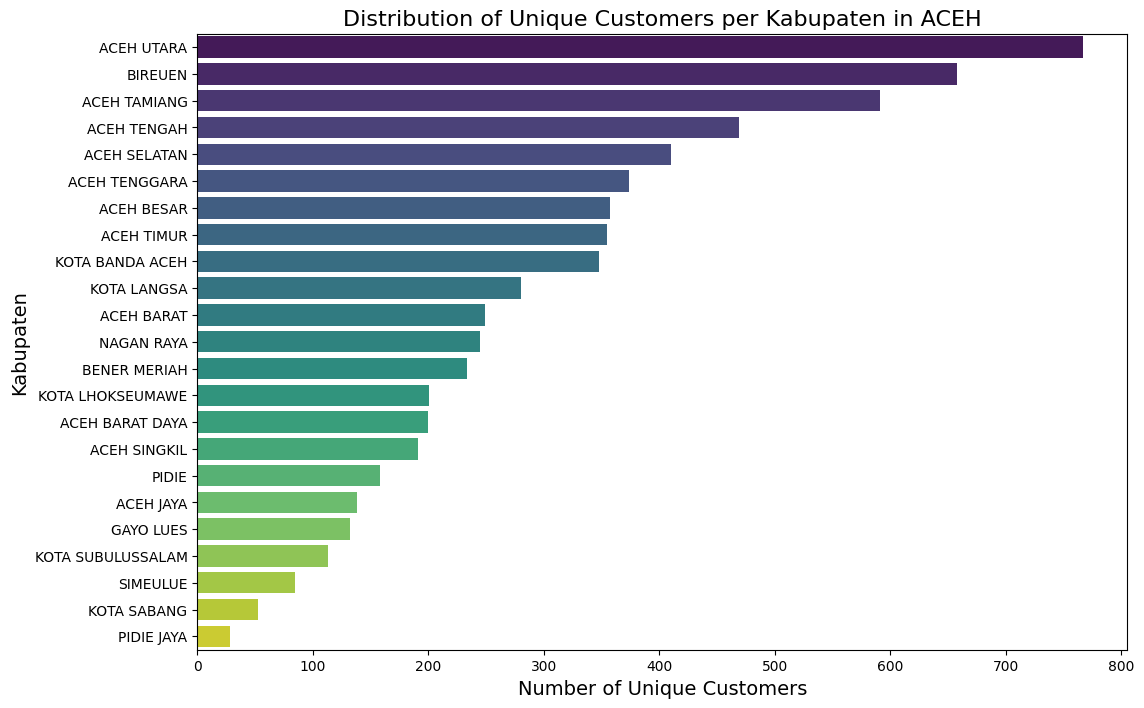

In [ ]:
provinsi_tertentu = 'ACEH'
df_provinsi_tertentu = df[df['nama_provinsi'] == provinsi_tertentu]

#Hitung jumlah pelanggan per kabupaten
customer_num_per_kabupaten = df_provinsi_tertentu.groupby("nama_kabupaten")['user_id'].nunique().sort_values(ascending=False)

# Plotting the distribution of unique customers per kabupaten in ACEH
plt.figure(figsize=(12, 8))
sns.barplot(x=customer_num_per_kabupaten.values, y=customer_num_per_kabupaten.index, palette="viridis")

# Adding titles and labels
plt.title('Distribution of Unique Customers per Kabupaten in ACEH', fontsize=16)
plt.xlabel('Number of Unique Customers', fontsize=14)
plt.ylabel('Kabupaten', fontsize=14)

# Display the plot
plt.show()

In [ ]:
provinsi_tertentu = 'ACEH'
df_provinsi_tertentu = df[df['nama_provinsi'] == provinsi_tertentu]

#Hitung jumlah pelanggan per kabupaten
customer_num_per_kabupaten = df_provinsi_tertentu.groupby("nama_kabupaten")['user_id'].nunique().sort_values(ascending=False)

customer_num_per_kabupaten

nama_kabupaten
ACEH UTARA           767
BIREUEN              658
ACEH TAMIANG         591
ACEH TENGAH          469
ACEH SELATAN         410
ACEH TENGGARA        374
ACEH BESAR           357
ACEH TIMUR           355
KOTA BANDA ACEH      348
KOTA LANGSA          280
ACEH BARAT           249
NAGAN RAYA           245
BENER MERIAH         234
KOTA LHOKSEUMAWE     201
ACEH BARAT DAYA      200
ACEH SINGKIL         191
PIDIE                158
ACEH JAYA            138
GAYO LUES            132
KOTA SUBULUSSALAM    113
SIMEULUE              85
KOTA SABANG           53
PIDIE JAYA            28
Name: user_id, dtype: int64

Jumlah pelanggan terbanyak di Provinsi Aceh terdapat di kabupaten aceh utara dan sedikit di kabupaten pidie jaya

**Jumlah pelanggan per provinsi di papua**

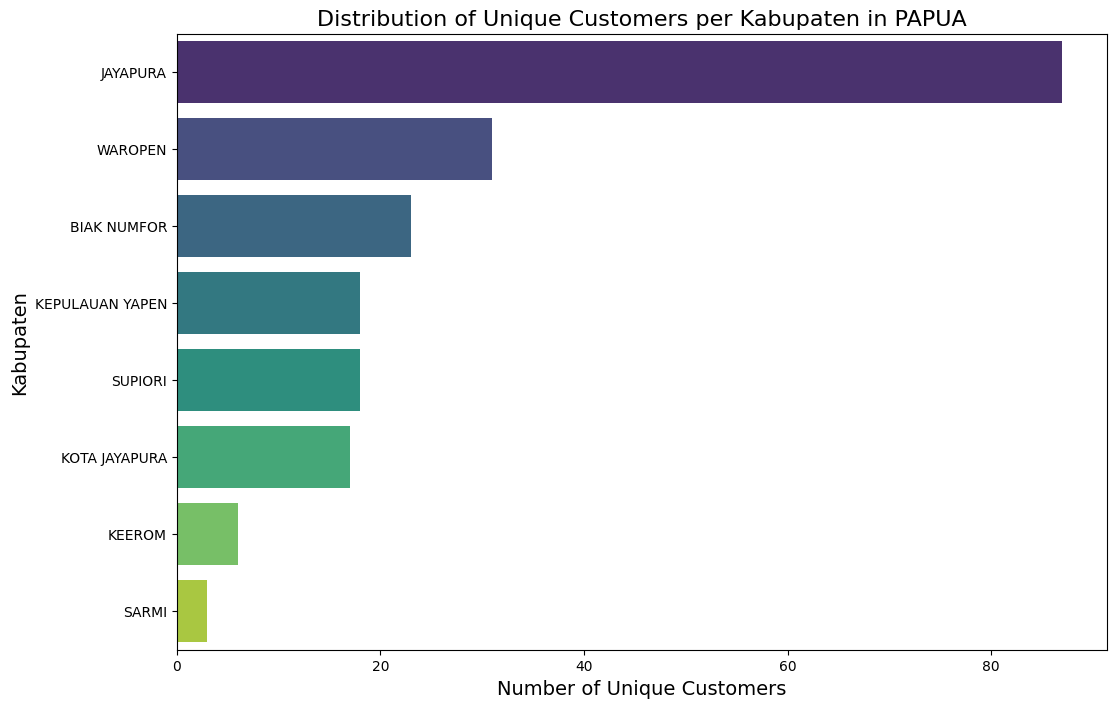

In [ ]:
provinsi_tertentu = 'P A P U A'
df_provinsi_tertentu = df[df['nama_provinsi'] == provinsi_tertentu]

#Hitung jumlah pelanggan per kabupaten
customer_num_per_kabupaten = df_provinsi_tertentu.groupby("nama_kabupaten")['user_id'].nunique().sort_values(ascending=False)

# Plotting the distribution of unique customers per kabupaten in PAPUA
plt.figure(figsize=(12, 8))
sns.barplot(x=customer_num_per_kabupaten.values, y=customer_num_per_kabupaten.index, palette="viridis")

# Adding titles and labels
plt.title('Distribution of Unique Customers per Kabupaten in PAPUA', fontsize=16)
plt.xlabel('Number of Unique Customers', fontsize=14)
plt.ylabel('Kabupaten', fontsize=14)

# Display the plot
plt.show()

In [ ]:
provinsi_tertentu = 'P A P U A'
df_provinsi_tertentu = df[df['nama_provinsi'] == provinsi_tertentu]

#Hitung jumlah pelanggan per kabupaten
customer_num_per_kabupaten = df_provinsi_tertentu.groupby("nama_kabupaten")['user_id'].nunique().sort_values(ascending=False)

customer_num_per_kabupaten

nama_kabupaten
JAYAPURA           87
WAROPEN            31
BIAK NUMFOR        23
KEPULAUAN YAPEN    18
SUPIORI            18
KOTA JAYAPURA      17
KEEROM              6
SARMI               3
Name: user_id, dtype: int64

Jumlah pelanggan terbanyak di provinsi papua terdapat di kabupaten jayapura dan sedikit di kabupaten sarmi

## **Total Penjualan**

**Melihat total penjualan setiap produk**

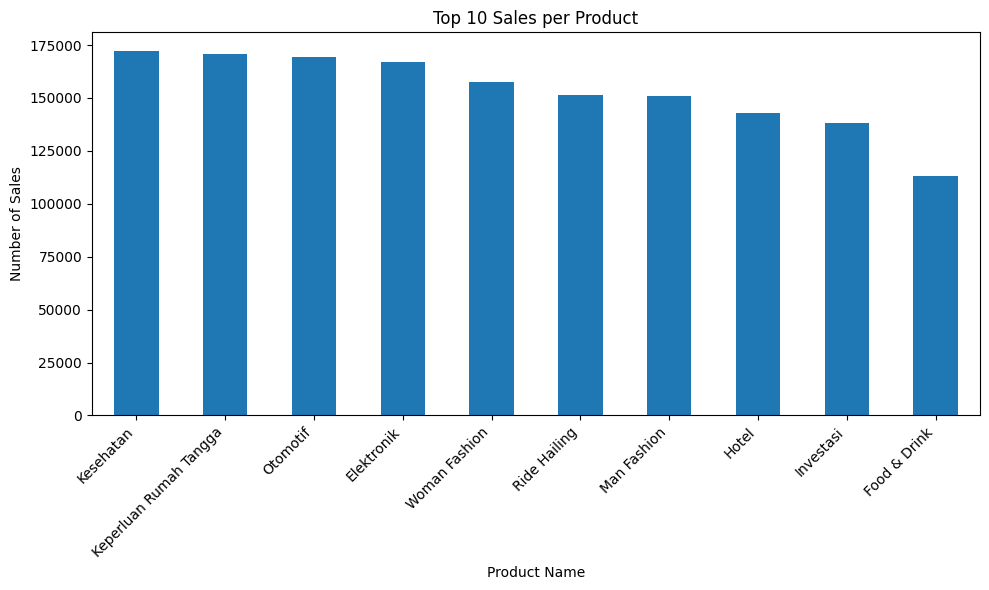

In [ ]:
sales_per_product = df["product_name"].value_counts().head(10)
sales_per_product.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Product Name')
plt.ylabel('Number of Sales')
plt.title('Top 10 Sales per Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
sales_per_product = df["product_name"].value_counts()
sales_per_product

product_name
Kesehatan                              172396
Keperluan Rumah Tangga                 170784
Otomotif                               169424
Elektronik                             166780
Woman Fashion                          157513
Ride Hailing                           151592
Man Fashion                            151134
Hotel                                  143084
Investasi                              138383
Food & Drink                           113260
Keperluan Anak                          82825
Sewa Motor/Mobil                        77343
Travel                                  68106
Tagihan (WIFI, PLN)                     65300
Transportasi (Kereta,Pesawat,Kapal)     62543
Top Up Game                             41336
Pulsa                                   34305
Other                                   18627
Name: count, dtype: int64

Penjualan produk terbanyak terdapat di kesehatan dengan total penjualan 172396 produk

## **Revenue**

**Membuat feature baru bernama revenue untuk mengetahui total transaksi per user**

In [ ]:
df['revenue'] = df['gross_amount'] - df['discounts'] + df['refund']
df.head()

trx_id          user_id  full_name     gender      birth  join_date  \
5   TRX554781  SC9106012011001     NURLIA  perempuan 2005-09-14 2023-11-10   
6   TRX554823  SC9106012017001  IIS HARUN  perempuan 1965-08-10 2023-11-28   
7   TRX554824  SC9106012017001  IIS HARUN  perempuan 1965-08-10 2023-11-28   
9   TRX554826  SC9106012017001  IIS HARUN  perempuan 1965-08-10 2023-11-28   
11  TRX554868  SC9106011003005     SALMAH  perempuan 1987-08-06 2023-10-19   

   transaction_date product_id   product_name  gross_amount  discounts  \
5        2024-09-27          2  Woman Fashion       23300.0        0.0   
6        2024-05-27          2  Woman Fashion      147100.0        0.0   
7        2024-08-21          2  Woman Fashion       72700.0        0.0   
9        2024-05-02          2  Woman Fashion       98000.0     9500.0   
11       2024-10-28          2  Woman Fashion      123700.0        0.0   

    money_spent   refund  wallet_balance  kode_kecamatan nama_kecamatan  \
5     1910000.0  80000.0        940000.0          910601      BIAK KOTA   
6     2420000.0  20000.0        460000.0          910601      BIAK KOTA   
7     2420000.0  20000.0        460000.0          910601      BIAK KOTA   
9     2420000.0  20000.0        460000.0          910601      BIAK KOTA   
11    1540000.0  70000.0       1040000.0          910601      BIAK KOTA   

    kode_kabupaten nama_kabupaten kode_provinsi nama_provinsi   revenue  
5             9106    BIAK NUMFOR            91     P A P U A  103300.0  
6             9106    BIAK NUMFOR            91     P A P U A  167100.0  
7             9106    BIAK NUMFOR            91     P A P U A   92700.0  
9             9106    BIAK NUMFOR            91     P A P U A  108500.0  
11            9106    BIAK NUMFOR            91     P A P U A  193700.0

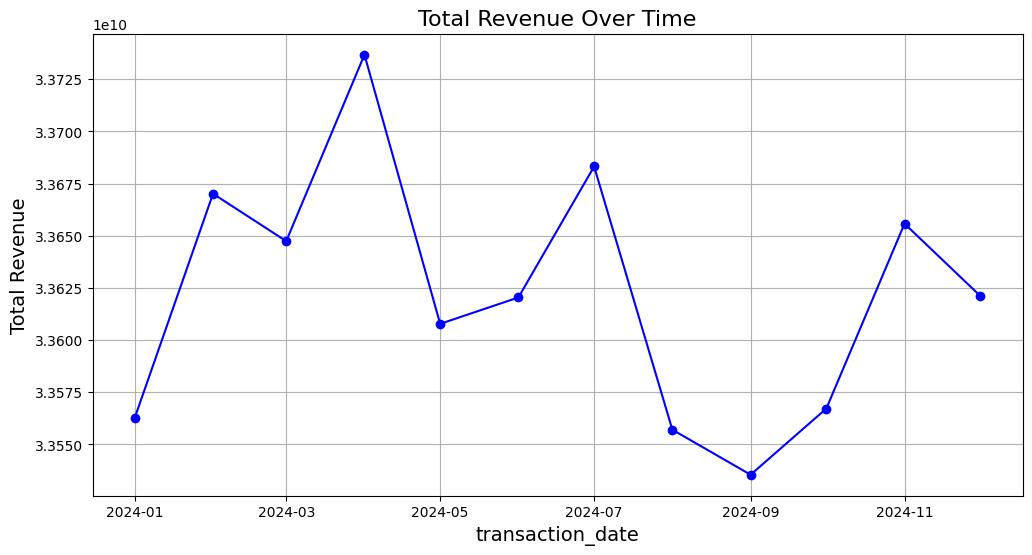

In [ ]:
# Group by date and sum the revenue
revenue_by_transaction_date = df.groupby(df['transaction_date'].dt.to_period("M"))['revenue'].sum().reset_index()
revenue_by_transaction_date['transaction_date'] = revenue_by_transaction_date['transaction_date'].dt.to_timestamp()  # convert period to timestamp for plotting

# Plotting the total revenue over time
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_transaction_date['transaction_date'], revenue_by_transaction_date['revenue'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Total Revenue Over Time', fontsize=16)
plt.xlabel('transaction_date', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.grid(True)

# Display the plot
plt.show()

**Total Pendapatan Keseluruhan**

In [ ]:
# Calculate the total revenue across the entire dataset
total_revenue_sum = df["revenue"].sum()

# Display the total revenue
print(f"Total Revenue Across the Entire Dataset: {total_revenue_sum}")

Total Revenue Across the Entire Dataset: 403465402200.0


In [ ]:
# Menghitung rata-rata dari kolom cltv
average_revenue = df['revenue'].mean()

# Menampilkan hasil rata-rata
print("Rata-rata revenue:", average_revenue)

Rata-rata revenue: 203284.26827762902


**Total pendapatan per provinsi**

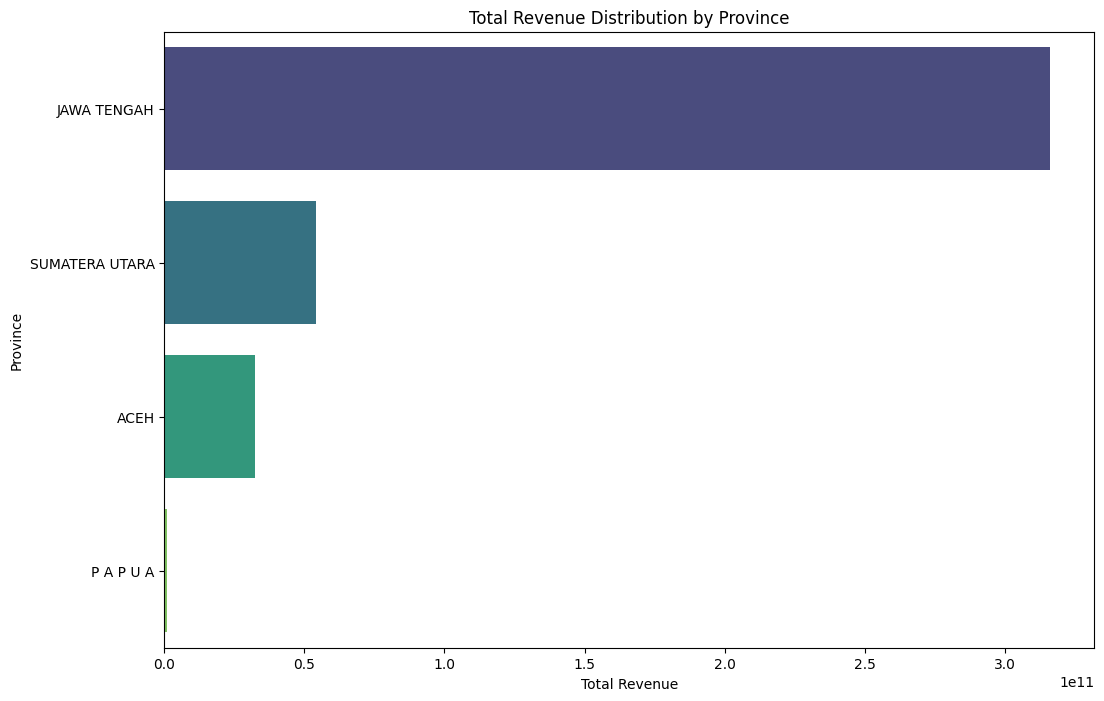

In [ ]:
# Group by 'nama_provinsi' and sum the 'revenue', then sort in descending order
total_revenue = df.groupby("nama_provinsi")["revenue"].sum().sort_values(ascending=False)

# Plotting the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=total_revenue.values, y=total_revenue.index, palette="viridis")
plt.title("Total Revenue Distribution by Province")
plt.xlabel("Total Revenue")
plt.ylabel("Province")
plt.show()

In [ ]:
total_revenue = df.groupby("nama_provinsi")["revenue"].sum().sort_values(ascending=False)
total_revenue

nama_provinsi
JAWA TENGAH       3.162192e+11
SUMATERA UTARA    5.400994e+10
ACEH              3.234113e+10
P A P U A         8.950973e+08
Name: revenue, dtype: float64

**Total pendapatan per kabupaten di provinsi jateng**

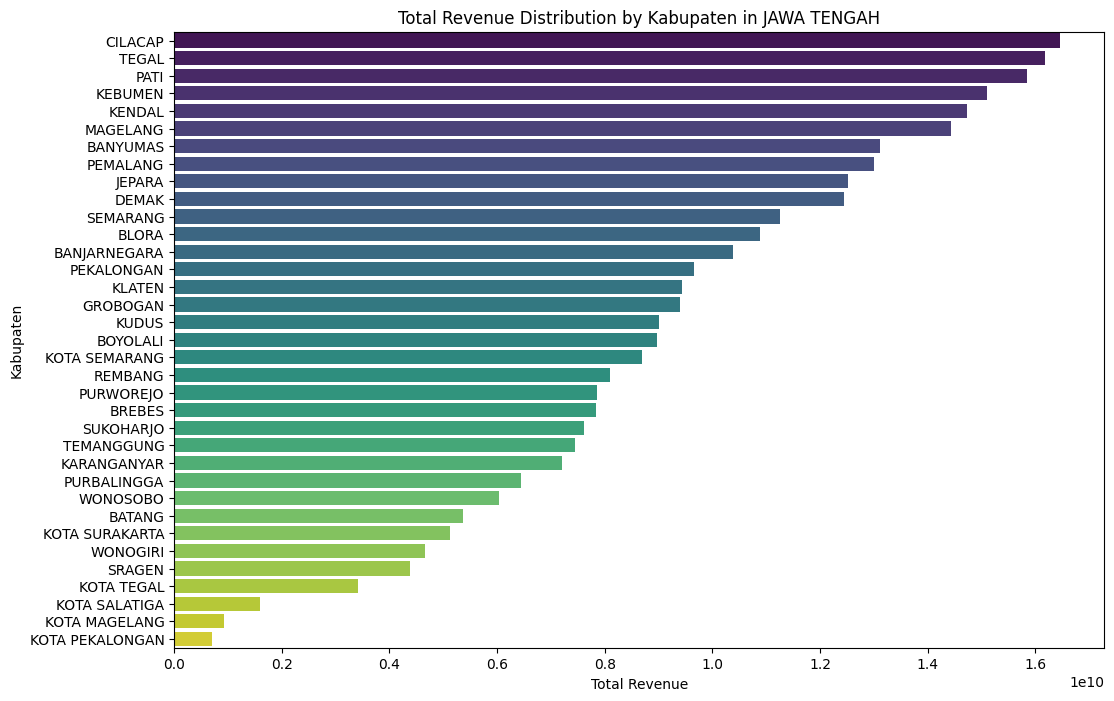

In [ ]:
# Specify the province
provinsi_tertentu = 'JAWA TENGAH'

# Filter the DataFrame for the specified province
df_provinsi_tertentu = df[df['nama_provinsi'] == provinsi_tertentu]

# Group by 'nama_kabupaten' and sum the 'revenue', then sort in descending order
total_revenue = df_provinsi_tertentu.groupby("nama_kabupaten")["revenue"].sum().sort_values(ascending=False)

# Plotting the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=total_revenue.values, y=total_revenue.index, palette="viridis")
plt.title(f"Total Revenue Distribution by Kabupaten in {provinsi_tertentu}")
plt.xlabel("Total Revenue")
plt.ylabel("Kabupaten")
plt.show()

In [ ]:
provinsi_tertentu = 'JAWA TENGAH'
df_provinsi_tertentu = df[df['nama_provinsi'] == provinsi_tertentu]

total_revenue = df_provinsi_tertentu.groupby("nama_kabupaten")["revenue"].sum().sort_values(ascending=False)
total_revenue

nama_kabupaten
CILACAP            1.645594e+10
TEGAL              1.618663e+10
PATI               1.584099e+10
KEBUMEN            1.509405e+10
KENDAL             1.473970e+10
MAGELANG           1.442836e+10
BANYUMAS           1.311608e+10
PEMALANG           1.300508e+10
JEPARA             1.252739e+10
DEMAK              1.243890e+10
SEMARANG           1.124930e+10
BLORA              1.088911e+10
BANJARNEGARA       1.039208e+10
PEKALONGAN         9.652254e+09
KLATEN             9.438344e+09
GROBOGAN           9.398972e+09
KUDUS              9.013735e+09
BOYOLALI           8.975036e+09
KOTA SEMARANG      8.683669e+09
REMBANG            8.094944e+09
PURWOREJO          7.861900e+09
BREBES             7.836407e+09
SUKOHARJO          7.607309e+09
TEMANGGUNG         7.454812e+09
KARANGANYAR        7.199286e+09
PURBALINGGA        6.452048e+09
WONOSOBO           6.039567e+09
BATANG             5.362388e+09
KOTA SURAKARTA     5.119759e+09
WONOGIRI           4.662748e+09
SRAGEN             4.3758

**Total pendapatan per kabupaten di provinsi sumut**

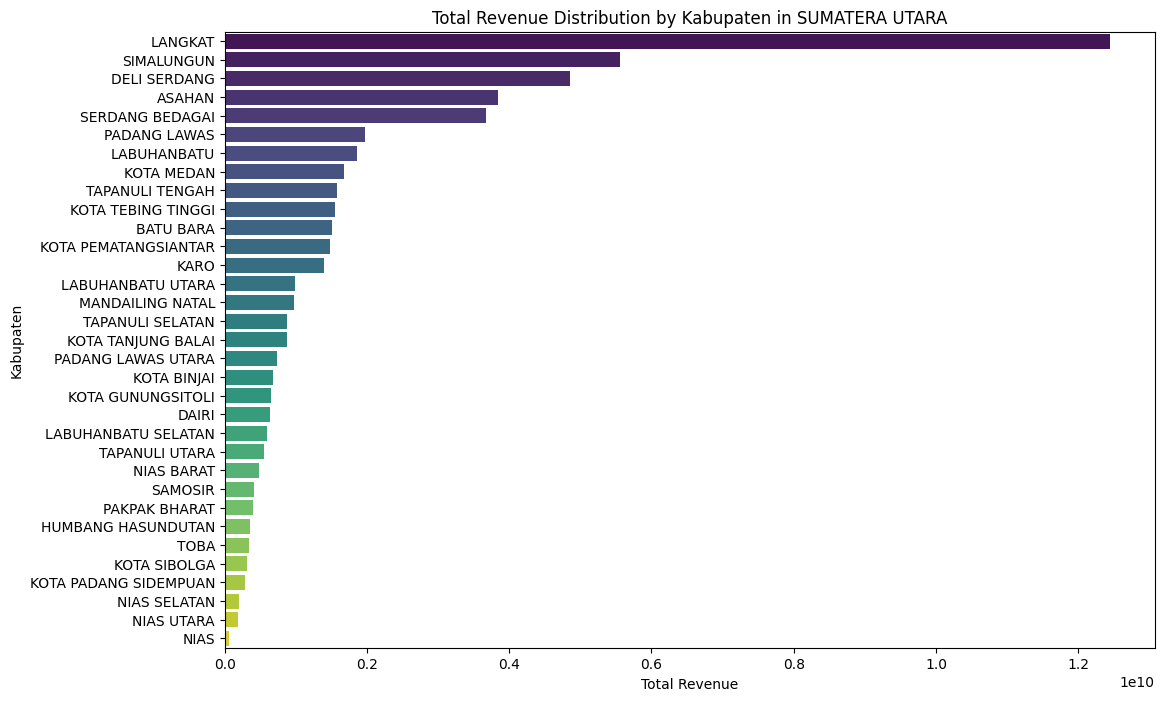

In [ ]:
# Specify the province
provinsi_tertentu = 'SUMATERA UTARA'

# Filter the DataFrame for the specified province
df_provinsi_tertentu = df[df['nama_provinsi'] == provinsi_tertentu]

# Group by 'nama_kabupaten' and sum the 'revenue', then sort in descending order
total_revenue = df_provinsi_tertentu.groupby("nama_kabupaten")["revenue"].sum().sort_values(ascending=False)

# Plotting the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=total_revenue.values, y=total_revenue.index, palette="viridis")
plt.title(f"Total Revenue Distribution by Kabupaten in {provinsi_tertentu}")
plt.xlabel("Total Revenue")
plt.ylabel("Kabupaten")
plt.show()

In [ ]:
provinsi_tertentu = 'SUMATERA UTARA'
df_provinsi_tertentu = df[df['nama_provinsi'] == provinsi_tertentu]

total_revenue = df_provinsi_tertentu.groupby("nama_kabupaten")["revenue"].sum().sort_values(ascending=False)
total_revenue

nama_kabupaten
LANGKAT                  1.245438e+10
SIMALUNGUN               5.555306e+09
DELI SERDANG             4.851124e+09
ASAHAN                   3.841109e+09
SERDANG BEDAGAI          3.672244e+09
PADANG LAWAS             1.967676e+09
LABUHANBATU              1.864301e+09
KOTA MEDAN               1.679654e+09
TAPANULI TENGAH          1.578797e+09
KOTA TEBING TINGGI       1.554582e+09
BATU BARA                1.509070e+09
KOTA PEMATANGSIANTAR     1.473548e+09
KARO                     1.391803e+09
LABUHANBATU UTARA        9.850504e+08
MANDAILING NATAL         9.728061e+08
TAPANULI SELATAN         8.816099e+08
KOTA TANJUNG BALAI       8.729660e+08
PADANG LAWAS UTARA       7.371253e+08
KOTA BINJAI              6.833238e+08
KOTA GUNUNGSITOLI        6.435597e+08
DAIRI                    6.413895e+08
LABUHANBATU SELATAN      5.995629e+08
TAPANULI UTARA           5.538460e+08
NIAS BARAT               4.753694e+08
SAMOSIR                  4.179056e+08
PAKPAK BHARAT            4.005535e+

**Total pendapatan per kabupaten di provinsi aceh**

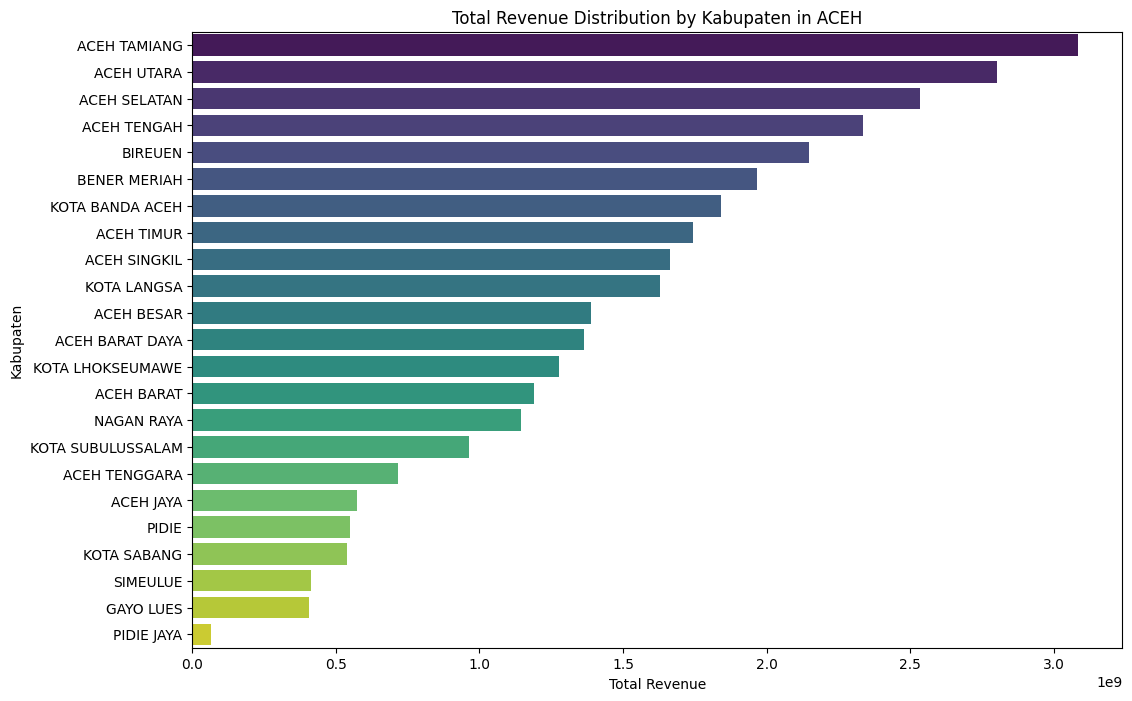

In [ ]:
# Specify the province
provinsi_tertentu = 'ACEH'

# Filter the DataFrame for the specified province
df_provinsi_tertentu = df[df['nama_provinsi'] == provinsi_tertentu]

# Group by 'nama_kabupaten' and sum the 'revenue', then sort in descending order
total_revenue = df_provinsi_tertentu.groupby("nama_kabupaten")["revenue"].sum().sort_values(ascending=False)

# Plotting the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=total_revenue.values, y=total_revenue.index, palette="viridis")
plt.title(f"Total Revenue Distribution by Kabupaten in {provinsi_tertentu}")
plt.xlabel("Total Revenue")
plt.ylabel("Kabupaten")
plt.show()

In [ ]:
provinsi_tertentu = 'ACEH'
df_provinsi_tertentu = df[df['nama_provinsi'] == provinsi_tertentu]

total_revenue = df_provinsi_tertentu.groupby("nama_kabupaten")["revenue"].sum().sort_values(ascending=False)
total_revenue

nama_kabupaten
ACEH TAMIANG         3.084784e+09
ACEH UTARA           2.801385e+09
ACEH SELATAN         2.536050e+09
ACEH TENGAH          2.335050e+09
BIREUEN              2.146437e+09
BENER MERIAH         1.966047e+09
KOTA BANDA ACEH      1.840187e+09
ACEH TIMUR           1.743428e+09
ACEH SINGKIL         1.662123e+09
KOTA LANGSA          1.628711e+09
ACEH BESAR           1.387530e+09
ACEH BARAT DAYA      1.365145e+09
KOTA LHOKSEUMAWE     1.278813e+09
ACEH BARAT           1.191220e+09
NAGAN RAYA           1.143699e+09
KOTA SUBULUSSALAM    9.628621e+08
ACEH TENGGARA        7.159191e+08
ACEH JAYA            5.748463e+08
PIDIE                5.500475e+08
KOTA SABANG          5.398403e+08
SIMEULUE             4.143818e+08
GAYO LUES            4.068759e+08
PIDIE JAYA           6.575000e+07
Name: revenue, dtype: float64

**Total pendapatan per kabupaten di provinsi papua**

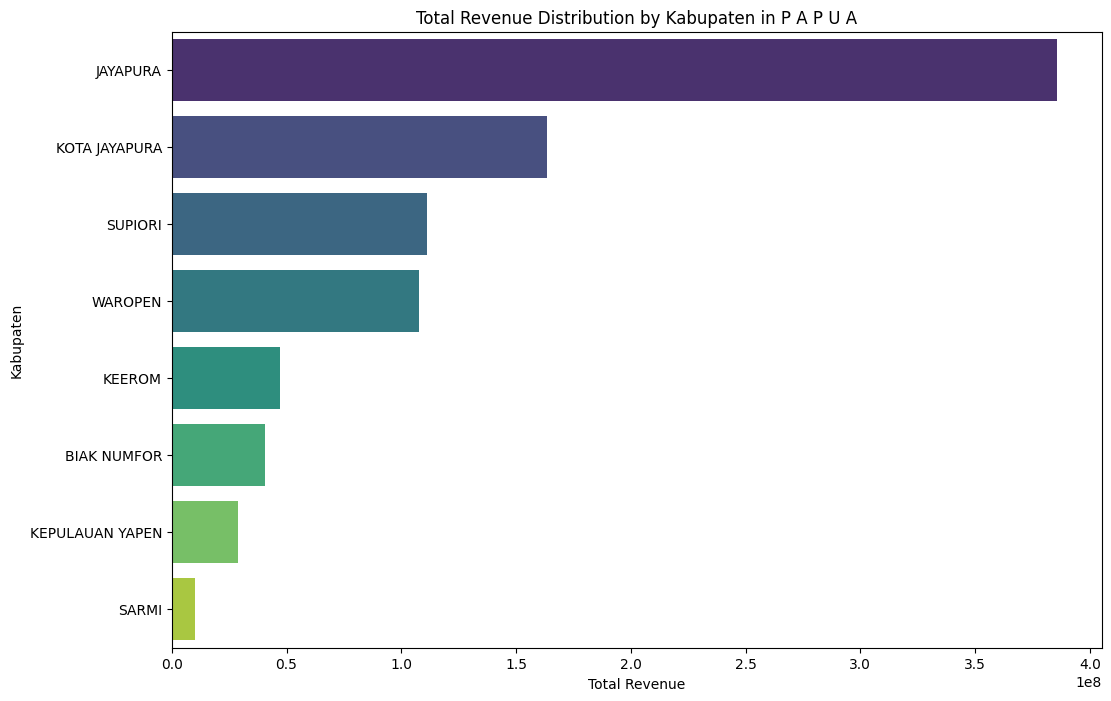

In [ ]:
# Specify the province
provinsi_tertentu = 'P A P U A'

# Filter the DataFrame for the specified province
df_provinsi_tertentu = df[df['nama_provinsi'] == provinsi_tertentu]

# Group by 'nama_kabupaten' and sum the 'revenue', then sort in descending order
total_revenue = df_provinsi_tertentu.groupby("nama_kabupaten")["revenue"].sum().sort_values(ascending=False)

# Plotting the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=total_revenue.values, y=total_revenue.index, palette="viridis")
plt.title(f"Total Revenue Distribution by Kabupaten in {provinsi_tertentu}")
plt.xlabel("Total Revenue")
plt.ylabel("Kabupaten")
plt.show()

In [ ]:
provinsi_tertentu = 'P A P U A'
df_provinsi_tertentu = df[df['nama_provinsi'] == provinsi_tertentu]

total_revenue = df_provinsi_tertentu.groupby("nama_kabupaten")["revenue"].sum().sort_values(ascending=False)
total_revenue

nama_kabupaten
JAYAPURA           385912000.0
KOTA JAYAPURA      163431500.0
SUPIORI            111343300.0
WAROPEN            107562000.0
KEEROM              47102600.0
BIAK NUMFOR         40533600.0
KEPULAUAN YAPEN     29022500.0
SARMI               10189800.0
Name: revenue, dtype: float64

## **Age**

**membuat feature baru bernama age untuk mengetahui umur customer**

In [ ]:
# Menghitung umur berdasarkan tahun sekarang (2024)
current_year = 2024
df['age'] = current_year - df['birth'].dt.year

# Menampilkan dataframe setelah kolom 'age' ditambahkan
df.head()

trx_id          user_id  full_name     gender      birth  join_date  \
5   TRX554781  SC9106012011001     NURLIA  perempuan 2005-09-14 2023-11-10   
6   TRX554823  SC9106012017001  IIS HARUN  perempuan 1965-08-10 2023-11-28   
7   TRX554824  SC9106012017001  IIS HARUN  perempuan 1965-08-10 2023-11-28   
9   TRX554826  SC9106012017001  IIS HARUN  perempuan 1965-08-10 2023-11-28   
11  TRX554868  SC9106011003005     SALMAH  perempuan 1987-08-06 2023-10-19   

   transaction_date product_id   product_name  gross_amount  discounts  \
5        2024-09-27          2  Woman Fashion       23300.0        0.0   
6        2024-05-27          2  Woman Fashion      147100.0        0.0   
7        2024-08-21          2  Woman Fashion       72700.0        0.0   
9        2024-05-02          2  Woman Fashion       98000.0     9500.0   
11       2024-10-28          2  Woman Fashion      123700.0        0.0   

    money_spent   refund  wallet_balance  kode_kecamatan nama_kecamatan  \
5     1910000.0  80000.0        940000.0          910601      BIAK KOTA   
6     2420000.0  20000.0        460000.0          910601      BIAK KOTA   
7     2420000.0  20000.0        460000.0          910601      BIAK KOTA   
9     2420000.0  20000.0        460000.0          910601      BIAK KOTA   
11    1540000.0  70000.0       1040000.0          910601      BIAK KOTA   

    kode_kabupaten nama_kabupaten kode_provinsi nama_provinsi   revenue  age  
5             9106    BIAK NUMFOR            91     P A P U A  103300.0   19  
6             9106    BIAK NUMFOR            91     P A P U A  167100.0   59  
7             9106    BIAK NUMFOR            91     P A P U A   92700.0   59  
9             9106    BIAK NUMFOR            91     P A P U A  108500.0   59  
11            9106    BIAK NUMFOR            91     P A P U A  193700.0   37

In [ ]:
# Membuat plot histogram distribusi umur
plot_data = [go.Histogram(x=df['age'])]

plot_layout = go.Layout(
    title='Distribusi Umur',
    xaxis=dict(title='Umur'),
    yaxis=dict(title='Frekuensi')
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
# Menghitung distribusi gender
gender_counts = df['gender'].value_counts()

# Menghitung persentase setiap gender
total_counts = gender_counts.sum()
gender_percentages = (gender_counts / total_counts) * 100

# Membuat teks untuk ditampilkan pada bar chart
text = [f'{value:.2f}%' for value in gender_percentages]

# Membuat bar chart distribusi gender dengan persentase
plot_data = [go.Bar(
    x=gender_counts.index,
    y=gender_counts.values,
    text=text,
    textposition='auto'
)]

plot_layout = go.Layout(
    title='Distribusi Gender',
    xaxis=dict(title='Gender'),
    yaxis=dict(title='Jumlah')
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
# Membuat pie chart distribusi gender
gender_counts = df['gender'].value_counts()
plot_data = [go.Pie(labels=gender_counts.index, values=gender_counts.values)]

plot_layout = go.Layout(
    title='Distribusi Gender'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# **A. RFM**

**Segmentation Techniques**

Kita dapat melakukan banyak segmentasi yang berbeda sesuai dengan apa yang ingin dicapai. Jika kita ingin meningkatkan retention rate, kita dapat melakukan segmentasi berdasarkan churn probability dan mengambil tindakan. Tetapi ada metode segmentasi yang sangat umum dan berguna juga. Sekarang kita akan menerapkan salah satu metode tersebut pada bisnis kita yaitu **RFM**. RFM adalah singkatan dari Recency - Frequency - Monetary Value. Secara teoritis kita akan memiliki segmen seperti di bawah ini:

* Low Value: Pelanggan yang kurang aktif dibandingkan yang lain, tidak terlalu sering menjadi pembeli/pengunjung dan menghasilkan pendapatan yang sangat rendah - nol - mungkin negatif.

* Mid Value: Berada di tengah-tengah dari semuanya. Sering menggunakan platform kami (tetapi tidak sebanyak High Value), cukup sering dan menghasilkan pendapatan yang moderat.

* High Value: Kelompok yang tidak ingin kita hilangkan (pertahankan). Pendapatan Tinggi, Frekuensi dan Ketidakaktifan yang rendah.

Sebagai metodologi, kita perlu menghitung Recency, Frequency dan Monetary Value (kita akan menyebutnya Revenue) dan menerapkan unsupervised machine learning untuk mengidentifikasi kelompok (cluster) yang berbeda untuk masing-masing. Mari kita masuk ke dalam coding dan melihat bagaimana cara melakukan RFM Clustering.

# **1. Recency**

Untuk menghitung recency, kita perlu mengetahui tanggal pembelian terakhir dari setiap pelanggan dan melihat berapa hari mereka tidak aktif. Setelah mendapatkan jumlah hari tidak aktif untuk setiap pelanggan, kita akan menerapkan pengelompokan K-means untuk memberikan skor recency kepada pelanggan.

In [ ]:
#Buat dataframe baru untuk menyimpan userid dan skor segmentasi
df_user = pd.DataFrame(df['user_id'].unique())
df_user.columns = ['user_id']
df_user.head()

user_id
0  SC9106012011001
1  SC9106012017001
2  SC9106011003005
3  SC9106032003001
4  SC9106032036001

Karena kita menghitung recency, kita perlu mengetahui kapan terakhir kali orang tersebut membeli sesuatu. Mari kita hitung tanggal terakhir transaksi seseorang.

In [ ]:
# Mari kita lihat tanggal maksimum dalam kumpulan data. Berdasarkan itu, kita akan menetapkan sebuah tanggal referensi.
df['transaction_date'].max()

Timestamp('2024-12-31 00:00:00')

In [ ]:
# Kita akan menetapkan tanggal referensi.
today_date = dt.datetime(2024, 12, 31)

In [ ]:
#dapatkan tanggal pembelian maksimal untuk setiap pelanggan dan buat dataframenya
df_max_purchase = df.groupby('user_id').transaction_date.max().reset_index()
df_max_purchase.columns = ['user_id','MaxPurchaseDate']
df_max_purchase.head()

user_id MaxPurchaseDate
0  SC1101012001002      2024-11-03
1  SC1101012001003      2024-12-11
2  SC1101012002001      2024-12-30
3  SC1101012002002      2024-12-30
4  SC1101012003002      2024-12-27

In [ ]:
#Bandingkan transaksi maksimal dari dataset dengan tanggal transaksi terakhir dari masing-masing userid
df_max_purchase['Recency'] = (df_max_purchase['MaxPurchaseDate'].max() - df_max_purchase['MaxPurchaseDate']).dt.days
df_max_purchase.head()

user_id MaxPurchaseDate  Recency
0  SC1101012001002      2024-11-03       58
1  SC1101012001003      2024-12-11       20
2  SC1101012002001      2024-12-30        1
3  SC1101012002002      2024-12-30        1
4  SC1101012003002      2024-12-27        4

In [ ]:
#gabungkan dataframe ini ke dataframe pengguna baru kita
df_user = pd.merge(df_user, df_max_purchase[['user_id','Recency']], on='user_id')
df_user.head()

user_id  Recency
0  SC9106012011001       15
1  SC9106012017001       20
2  SC9106011003005       23
3  SC9106032003001        8
4  SC9106032036001       29

In [ ]:
#plot a recency histogram
plot_data = [go.Histogram(x=df_user['Recency'])]

plot_layout = go.Layout(title='Recency')
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# **2. Recency Score**

Kita akan menerapkan beberapa metode clustering untuk menetapkan recency score. Tetapi kita harus mengetahui berapa banyak cluster yang kita butuhkan untuk algoritma beberapa metode. Untuk mengetahuinya, kita akan menerapkan Elbow Method. Metode Elbow hanya memberitahu jumlah cluster optimal untuk inersia optimal.

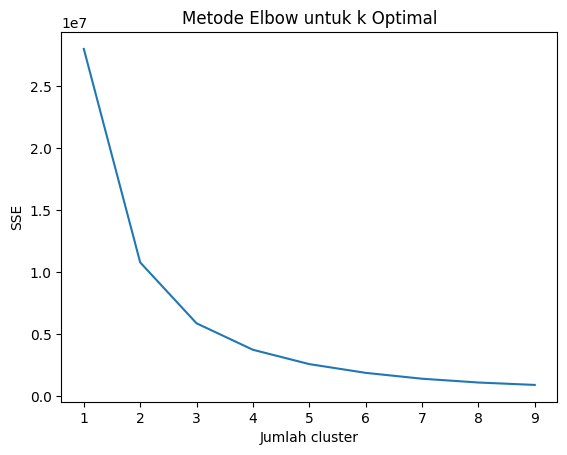

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans, SpectralClustering, BisectingKMeans, ward_tree, Birch

sse = {}
df_recency = df_user[['Recency']].copy()
df_recency = df_recency.astype('int16')

for k in range(1, 10):
     kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_recency)
     sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Jumlah cluster")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk k Optimal")
plt.show()

### **K-Means**

In [ ]:
range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    # Inisialisasi kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_recency.to_numpy())

    cluster_labels = kmeans.labels_

    # Skor siluet
    silhouette_avg = silhouette_score(df_recency.to_numpy(), cluster_labels)
    print("Untuk n_clusters={0}, skor siluet adalah {1}".format(num_clusters, silhouette_avg))

Untuk n_clusters=2, skor siluet adalah 0.6847034631859196
Untuk n_clusters=3, skor siluet adalah 0.6438586870601313
Untuk n_clusters=4, skor siluet adalah 0.6109766201588847
Untuk n_clusters=5, skor siluet adalah 0.592696797315201


### **MiniBatch Kmeans**

In [ ]:
range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    # Inisialisasi mb kmeans
    mb_kmeans = MiniBatchKMeans(n_clusters=num_clusters, max_iter=50)
    mb_kmeans.fit(df_recency.to_numpy())

    cluster_labels = mb_kmeans.labels_

    # Skor siluet
    silhouette_avg = silhouette_score(df_recency.to_numpy(), cluster_labels)
    print("Untuk n_clusters={0}, skor siluet adalah {1}".format(num_clusters, silhouette_avg))

Untuk n_clusters=2, skor siluet adalah 0.6847034631859196
Untuk n_clusters=3, skor siluet adalah 0.6376721557801308
Untuk n_clusters=4, skor siluet adalah 0.579563552580503
Untuk n_clusters=5, skor siluet adalah 0.5355450732566371


### **Birch**

In [ ]:
range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    # Inisialisasi birch
    bisec_kmeans = Birch(n_clusters=num_clusters)
    bisec_kmeans.fit(df_recency)

    cluster_labels = bisec_kmeans.labels_

    # Skor siluet
    silhouette_avg = silhouette_score(df_recency, cluster_labels)
    print("Untuk n_clusters={0}, skor siluet adalah {1}".format(num_clusters, silhouette_avg))

Untuk n_clusters=2, skor siluet adalah 0.8757324900612564
Untuk n_clusters=3, skor siluet adalah 0.867052625872569
Untuk n_clusters=4, skor siluet adalah 0.7423137736183733
Untuk n_clusters=5, skor siluet adalah 0.7414019319522034


Berdasarkan perbandingan 3 metode clustering, terlihat pada metode birch lah yang paling optimal dengan n_cluster = 2. Namun berdasarkan kebutuhan bisnis kita akan membuat 3 cluster.

In [ ]:
import gc
gc.collect()

38429

In [ ]:
#build 3 clusters for recency and add it to dataframe
birch = Birch(n_clusters=3)
df_user['RecencyCluster'] = birch.fit_predict(df_user[['Recency']])

In [ ]:
df_user.head()

user_id  Recency  RecencyCluster
0  SC9106012011001       15               0
1  SC9106012017001       20               0
2  SC9106011003005       23               0
3  SC9106032003001        8               0
4  SC9106032036001       29               0

In [ ]:
df_user.groupby('RecencyCluster')['Recency'].describe()

count        mean        std    min     25%    50%    75%  \
RecencyCluster                                                                
0               84398.0   16.182670  17.113425    0.0    4.00   11.0   23.0   
1                 124.0  158.895161  25.256350  131.0  139.75  151.0  171.0   
2                   9.0  288.888889  37.915842  246.0  262.00  275.0  315.0   

                  max  
RecencyCluster         
0               129.0  
1               233.0  
2               358.0

**ordering cluster**

Kami memiliki klaster yang sesuai dengan setiap userid. Tetapi setiap klaster ditetapkan secara acak. Klaster 2 tidak lebih baik dari klaster 1. Kita ingin memberikan klaster sesuai dengan transaksi yang paling baru.

Pertama-tama kita akan mencari nilai rata-rata dari nilai recency yang berhubungan dengan setiap cluster. Kemudian kita akan mengurutkan nilai-nilai ini. Katakanlah cluster 0 memiliki nilai rata-rata transaksi terbaru. Dari tabel di atas kita melihat bahwa cluster 2 (mean recency 29) < cluster 1 > cluster 0. Itu berarti bahwa cluster 1 adalah yang paling tidak aktif dan cluster 0 adalah yang paling baru. Kita akan memberikan indeks pada cluster-cluster ini sebagai 0,1,2. Jadi cluster 2 menjadi cluster 0 dan seterusnya. Sekarang kita akan membuang nomor cluster asli dan menggantinya dengan 0,1,2. Kode ada di bawah ini

In [ ]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_user = order_cluster('RecencyCluster', 'Recency',df_user,False)

In [ ]:
df_user.head()

user_id  Recency  RecencyCluster
0  SC9106012011001       15               2
1  SC9106012017001       20               2
2  SC9106011003005       23               2
3  SC9106032003001        8               2
4  SC9106032036001       29               2

In [ ]:
df_user.groupby('RecencyCluster')['Recency'].describe()

count        mean        std    min     25%    50%    75%  \
RecencyCluster                                                                
0                   9.0  288.888889  37.915842  246.0  262.00  275.0  315.0   
1                 124.0  158.895161  25.256350  131.0  139.75  151.0  171.0   
2               84398.0   16.182670  17.113425    0.0    4.00   11.0   23.0   

                  max  
RecencyCluster         
0               358.0  
1               233.0  
2               129.0

Hebat! cluster 2 sebelumnya sekarang menjadi cluster 1 dan seterusnya. Klaster-klaster tersebut disusun berdasarkan ketidakaktifan. Cluster 0 sekarang adalah yang paling tidak aktif, dan cluster 2 yang paling aktif.

# **3. Frequency**

Untuk membuat frequency cluster, kita perlu menemukan jumlah total pesanan untuk setiap pelanggan. Pertama-tama, hitunglah ini dan lihat bagaimana frekuensi terlihat di database pelanggan kita

In [ ]:
#mendapatkan jumlah pesanan untuk setiap pengguna dan buat dataframenya
df_frequency = df.groupby('user_id').transaction_date.count().reset_index()
df_frequency.columns = ['user_id','Frequency']

In [ ]:
#berapa banyak pesanan yang dimiliki pelanggan
df_frequency.head()

user_id  Frequency
0  SC1101012001002         22
1  SC1101012001003         18
2  SC1101012002001         25
3  SC1101012002002         26
4  SC1101012003002         23

In [ ]:
#tambahkan data ini ke dataframe utama kita
df_user = pd.merge(df_user, df_frequency, on='user_id')

df_user.head()

user_id  Recency  RecencyCluster  Frequency
0  SC9106012011001       15               2         34
1  SC9106012017001       20               2         37
2  SC9106011003005       23               2         36
3  SC9106032003001        8               2         35
4  SC9106032036001       29               2         28

In [ ]:
#plot the histogram
plot_data = [go.Histogram(x=df_user['Frequency'])]

plot_layout = go.Layout(title='Frequency')
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# **4. Frequency Score**

Tentukan jumlah cluster yang tepat dengan elbow method

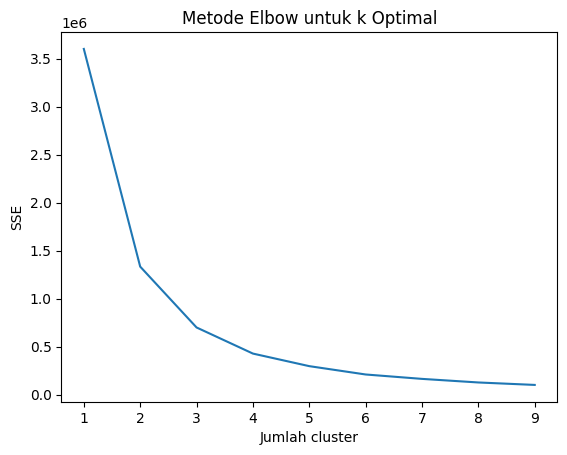

In [ ]:
sse = {}
df_frequency = df_user[['Frequency']].copy()


for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_frequency)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Jumlah cluster")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk k Optimal")
plt.show()

### **K-Means**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    # Inisialisasi kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_user[['Frequency']])

    cluster_labels = kmeans.labels_

    # Skor siluet
    silhouette_avg = silhouette_score(df_user[['Frequency']], cluster_labels)
    print("Untuk n_clusters={0}, skor siluet adalah {1}".format(num_clusters, silhouette_avg))

Untuk n_clusters=2, skor siluet adalah 0.5549026761948721
Untuk n_clusters=3, skor siluet adalah 0.5296182816869349
Untuk n_clusters=4, skor siluet adalah 0.5355463478271426
Untuk n_clusters=5, skor siluet adalah 0.5400386023734752


### **MiniBatch Kmeans**

In [ ]:
range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    # Inisialisasi kmeans
    mb_kmeans = MiniBatchKMeans(n_clusters=num_clusters, max_iter=50)
    mb_kmeans.fit(df_frequency.to_numpy())

    cluster_labels = mb_kmeans.labels_

    # Skor siluet
    silhouette_avg = silhouette_score(df_frequency.to_numpy(), cluster_labels)
    print("Untuk n_clusters={0}, skor siluet adalah {1}".format(num_clusters, silhouette_avg))


Untuk n_clusters=2, skor siluet adalah 0.5549026761948721
Untuk n_clusters=3, skor siluet adalah 0.5360321275473416
Untuk n_clusters=4, skor siluet adalah 0.5348605967127832
Untuk n_clusters=5, skor siluet adalah 0.5392192937812239


### **Birch**

In [ ]:
range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    # Inisialisasi kmeans
    bisec_kmeans = Birch(n_clusters=num_clusters)
    bisec_kmeans.fit(df_frequency)

    cluster_labels = bisec_kmeans.labels_

    # Skor siluet
    silhouette_avg = silhouette_score(df_frequency, cluster_labels)
    print("Untuk n_clusters={0}, skor siluet adalah {1}".format(num_clusters, silhouette_avg))

Untuk n_clusters=2, skor siluet adalah 0.5621058633203887
Untuk n_clusters=3, skor siluet adalah 0.38364231842632873
Untuk n_clusters=4, skor siluet adalah 0.4916926561602514
Untuk n_clusters=5, skor siluet adalah 0.49013194950342814


Berdasarkan perbandingan 3 metode clustering, terlihat pada metode K-Means lah yang paling optimal dengan n_cluster = 2. Namun berdasarkan kebutuhan bisnis kita akan membuat 3 cluster.

In [ ]:
# Applying k-Means
kmeans=KMeans(n_clusters=3)
df_user['FrequencyCluster']=kmeans.fit_predict(df_user[['Frequency']])

In [ ]:
df_user.head()

user_id  Recency  RecencyCluster  Frequency  FrequencyCluster
0  SC9106012011001       15               2         34                 2
1  SC9106012017001       20               2         37                 2
2  SC9106011003005       23               2         36                 2
3  SC9106032003001        8               2         35                 2
4  SC9106032036001       29               2         28                 0

In [ ]:
#order the frequency cluster
df_user = order_cluster('FrequencyCluster', 'Frequency', df_user, True )
df_user.groupby('FrequencyCluster')['Frequency'].describe()

count       mean       std   min   25%   50%   75%   max
FrequencyCluster                                                            
0                 27693.0  16.374427  3.280699   1.0  15.0  17.0  19.0  20.0
1                 38594.0  24.323807  2.235497  21.0  22.0  24.0  26.0  28.0
2                 18244.0  32.477801  3.381481  29.0  30.0  32.0  34.0  56.0

Clsuter dengan frekuensi maksimal adalah cluster 2, cluster dengan frekuensi paling sedikit adalah cluster 0.

# **5. Revenue**

Mari kita lihat bagaimana database pelanggan kita terlihat ketika kita mengelompokkannya berdasarkan pendapatan. Kita akan menghitung pendapatan untuk setiap pelanggan, memplot histogram dan menerapkan metode clustering yang sama.

In [ ]:
df_revenue = df.groupby('user_id').revenue.sum().reset_index()

In [ ]:
df_revenue.head()

user_id    revenue
0  SC1101012001002   830100.0
1  SC1101012001003  1097900.0
2  SC1101012002001  1280700.0
3  SC1101012002002  1434600.0
4  SC1101012003002  1225000.0

In [ ]:
#gabungkan data revenu ke dataframe utama kita
df_user = pd.merge(df_user, df_revenue, on='user_id')
df_user.head()

user_id  Recency  RecencyCluster  Frequency  FrequencyCluster  \
0  SC9106012011001       15               2         34                 2   
1  SC9106012017001       20               2         37                 2   
2  SC9106011003005       23               2         36                 2   
3  SC9106032003001        8               2         35                 2   
4  SC9106202006002       31               2         34                 2   

     revenue  
0  3170500.0  
1  1504300.0  
2  3273100.0  
3   851900.0  
4  1307300.0

In [ ]:
#plot the histogram
plot_data = [go.Histogram(x=df_user['revenue'])]

plot_layout = go.Layout(title='Monetary Value')
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# **6. Revenue Score**

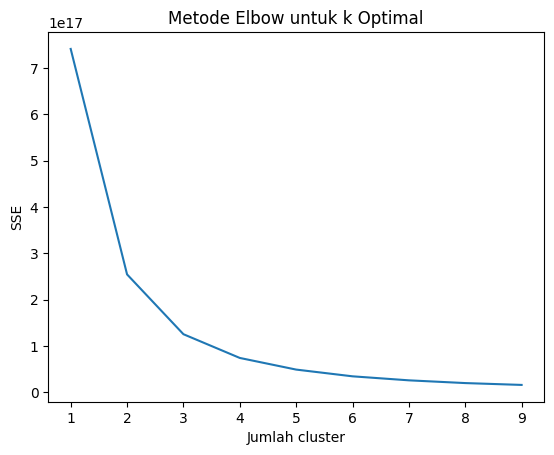

In [ ]:
sse = {}
df_revenue = df_user[['revenue']].copy()

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_revenue)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Jumlah cluster")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk k Optimal")
plt.show()

### **K-Means**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    # Inisialisasi kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_user[['revenue']])

    cluster_labels = kmeans.labels_

    # Skor siluet
    silhouette_avg = silhouette_score(df_user[['revenue']], cluster_labels)
    print("Untuk n_clusters={0}, skor siluet adalah {1}".format(num_clusters, silhouette_avg))

Untuk n_clusters=2, skor siluet adalah 0.5950695599012231
Untuk n_clusters=3, skor siluet adalah 0.5634070605671223
Untuk n_clusters=4, skor siluet adalah 0.5524449057973587
Untuk n_clusters=5, skor siluet adalah 0.5452637823890382


### **MiniBatch Kmeans**

In [ ]:
range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    # Inisialisasi kmeans
    mb_kmeans = MiniBatchKMeans(n_clusters=num_clusters, max_iter=50)
    mb_kmeans.fit(df_user[['revenue']].to_numpy())

    cluster_labels = mb_kmeans.labels_

    # Skor siluet
    silhouette_avg = silhouette_score(df_user[['revenue']].to_numpy(), cluster_labels)
    print("Untuk n_clusters={0}, skor siluet adalah {1}".format(num_clusters, silhouette_avg))

Untuk n_clusters=2, skor siluet adalah 0.5877507053704394
Untuk n_clusters=3, skor siluet adalah 0.5618486010319943
Untuk n_clusters=4, skor siluet adalah 0.5466437067831177
Untuk n_clusters=5, skor siluet adalah 0.5477385428569237


### **Birch**

In [ ]:
range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    # Inisialisasi kmeans
    bisec_kmeans = Birch(n_clusters=num_clusters)
    bisec_kmeans.fit(df_user[['revenue']])

    cluster_labels = bisec_kmeans.labels_

    # Skor siluet
    silhouette_avg = silhouette_score(df_user[['revenue']], cluster_labels)
    print("Untuk n_clusters={0}, skor siluet adalah {1}".format(num_clusters, silhouette_avg))

Untuk n_clusters=2, skor siluet adalah 0.5358324271221655
Untuk n_clusters=3, skor siluet adalah 0.5643096178725029
Untuk n_clusters=4, skor siluet adalah 0.5282671220648016
Untuk n_clusters=5, skor siluet adalah 0.4774554987127981


Berdasarkan perbandingan 3 metode clustering, terlihat pada metode kmeans lah yang paling optimal dengan n_cluster = 2. Namun berdasarkan kebutuhan bisnis kita akan membuat 3 cluster.

In [ ]:
#apply clustering
kmeans = KMeans(n_clusters=3)
df_user['RevenueCluster'] = kmeans.fit_predict(df_user[['revenue']])

In [ ]:
df_user.head()

user_id  Recency  RecencyCluster  Frequency  FrequencyCluster  \
0  SC9106012011001       15               2         34                 2   
1  SC9106012017001       20               2         37                 2   
2  SC9106011003005       23               2         36                 2   
3  SC9106032003001        8               2         35                 2   
4  SC9106202006002       31               2         34                 2   

     revenue  RevenueCluster  
0  3170500.0               0  
1  1504300.0               0  
2  3273100.0               0  
3   851900.0               0  
4  1307300.0               0

In [ ]:
#order the cluster numbers
df_user = order_cluster('RevenueCluster', 'revenue',df_user,True)
#show details of the dataframe
df_user.groupby('RevenueCluster')['revenue'].describe()

count          mean           std        min        25%  \
RevenueCluster                                                              
0               39285.0  2.338486e+06  1.004331e+06    24200.0  1462200.0   
1               33100.0  5.677672e+06  1.087300e+06  4015300.0  4738600.0   
2               12146.0  1.018171e+07  1.966288e+06  7939900.0  8666300.0   

                      50%         75%         max  
RevenueCluster                                     
0               2379100.0   3214600.0   4015200.0  
1               5540750.0   6543900.0   7939400.0  
2               9646600.0  11179400.0  22588300.0

Klaster 2 memiliki pendapatan maksimal, klaster 0 memiliki pendapatan terendah

# **7. RFM Score**

Kita memiliki skor (nomor klaster) untuk recency, frequency & revenue. Mari kita buat skor keseluruhan dari mereka

In [ ]:
#calculate overall score and use mean() to see details
df_user['OverallScore'] = df_user['RecencyCluster'] + df_user['FrequencyCluster'] + df_user['RevenueCluster']

df_user.groupby('OverallScore')[['Recency','Frequency','revenue']].mean()

Recency  Frequency       revenue
OverallScore                                     
0             288.888889   2.555556  1.756000e+05
1             159.747899   7.873950  1.142574e+06
2              22.729466  15.861542  2.142763e+06
3              16.325659  22.079924  3.393036e+06
4              14.062773  25.544240  5.237273e+06
5              12.234833  29.429931  7.387179e+06
6              10.426988  33.233638  1.072275e+07

Skor 6 adalah pelanggan terbaik kita, skor 0 adalah pelanggan terburuk kita.

In [ ]:
# Segmenting users based on OverallScore
df_user.loc[df_user['OverallScore'] <= 2, 'Segment'] = 'Low Value'
df_user.loc[(df_user['OverallScore'] > 2) & (df_user['OverallScore'] <= 4), 'Segment'] = 'Mid Value'
df_user.loc[df_user['OverallScore'] > 4, 'Segment'] = 'High Value'

In [ ]:
df_user.head()

user_id  Recency  RecencyCluster  Frequency  FrequencyCluster  \
0  SC9106012011001       15               2         34                 2   
1  SC9106012017001       20               2         37                 2   
2  SC9106011003005       23               2         36                 2   
3  SC9106032003001        8               2         35                 2   
4  SC9106202006002       31               2         34                 2   

     revenue  RevenueCluster  OverallScore    Segment  
0  3170500.0               0             4  Mid Value  
1  1504300.0               0             4  Mid Value  
2  3273100.0               0             4  Mid Value  
3   851900.0               0             4  Mid Value  
4  1307300.0               0             4  Mid Value

In [ ]:
# Membuat dataframe baru rfm
rfm = df_user[['user_id', 'Recency', 'Frequency', 'revenue', 'Segment']]

# Mengganti nama kolom Segment menjadi rfm_segment
rfm = rfm.rename(columns={'Segment': 'rfm_segment'})

# Menampilkan lima baris pertama dari dataframe rfm
rfm.head()

user_id  Recency  Frequency    revenue rfm_segment
0  SC9106012011001       15         34  3170500.0   Mid Value
1  SC9106012017001       20         37  1504300.0   Mid Value
2  SC9106011003005       23         36  3273100.0   Mid Value
3  SC9106032003001        8         35   851900.0   Mid Value
4  SC9106202006002       31         34  1307300.0   Mid Value

In [ ]:
# Berapa banyak pelanggan yang kita miliki di setiap segmen?
# Mari kita menganalisis statistik deskriptif dari segmen-segmen tersebut.
rfm[["rfm_segment", "Recency", "Frequency", "revenue"]].groupby("rfm_segment").agg(["mean", "median", "count"])

Recency                Frequency                     revenue  \
                  mean median  count       mean median  count          mean   
rfm_segment                                                                   
High Value   11.625618    8.0  19814  30.711719   30.0  19814  8.511215e+06   
Low Value    23.627973   16.0  20813  15.810119   16.0  20813  2.136193e+06   
Mid Value    15.168755   10.0  43904  23.851061   24.0  43904  4.335906e+06   

                               
                median  count  
rfm_segment                    
High Value   8402150.0  19814  
Low Value    2129900.0  20813  
Mid Value    4370850.0  43904

# **8. Visualisasi RFM**

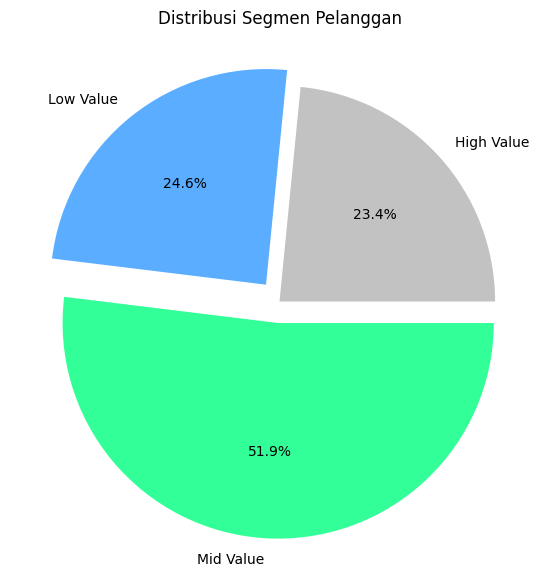

In [ ]:
# Menghitung jumlah pelanggan di setiap segmen
rfm1 = rfm.groupby("rfm_segment").size().reset_index(name='count')

# Warna untuk pie chart
colors = ['#C2C2C2', '#5BADFF', '#33FF99', '#FFAB4B',
          '#C184FF', '#AD6F33','#FFFF5B','#85BBB2',
          '#FF8484','#33FFFF']

fig1, ax1 = plt.subplots(figsize=(10, 7))

# Pastikan panjang explode sesuai dengan jumlah segmen unik
explode = [0.1 if i in [1, 2, 3] else 0 for i in range(len(rfm1["rfm_segment"].unique()))]

ax1.pie(rfm1["count"], labels=rfm1["rfm_segment"], colors=colors,
        explode=explode, autopct='%1.1f%%')

plt.title("Distribusi Segmen Pelanggan")
plt.show()

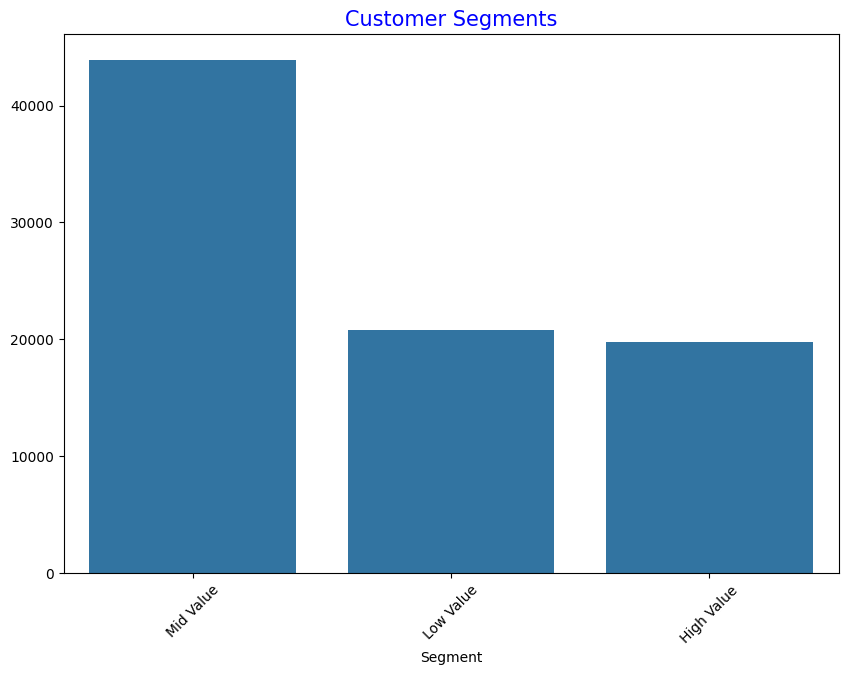

In [ ]:
sgm= df_user["Segment"].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=sgm.index,y=sgm.values)
plt.xticks(rotation=45)
plt.title('Customer Segments',color = 'blue',fontsize=15)
plt.show()

# **B. Customer Lifetime Value**

Customer lifetime value (CLV), adalah prediksi laba bersih perusahaan yang dikontribusikan pada keseluruhan hubungan masa depan dengan pelanggan. Modelnya bisa sederhana atau canggih, tergantung pada seberapa rumit teknik analisis prediktifnya.

Lifetime Value adalah metrik yang penting karena mewakili jumlah maksimum yang mungkin akan dibelanjakan oleh pelanggan untuk mendapatkan pelanggan baru. Akibatnya, ini sangat penting dalam menentukan pengembalian biaya pemasaran yang digunakan dalam pemodelan bauran pemasaran.

**Definition of CLTV**

Nilai sekarang dari cash flow masa depan yang diatribusikan kepada pelanggan selama masa hubungannya dengan perusahaan!

**RUMUS**

Estimasi nilai seumur hidup secara probabilistik dengan proyeksi waktu :



*   **Average Order Value** = Total Revenue / Total Number of Orders
*   **Purchase Frequency** = Total Number of Orders / Total Number of Customers
*   **Profit Margin** = Total Price / Profit Rate
*   **Churn Rate** = 1 - Repeat Rate
*   **Customer Value** = Purchase Frequency * Average Order Value
*   **CLTV** = ( Customer Value / Churn Rate) * Profit Margin
*   **CLTV Predict** = Expected Number of Transaction * Expected Average Profit


---


* BG/NBD = Expected transcation
* Gamma-Gamma = Expected Average Profit



# **CLTV Calculate**

In [ ]:
# Pertama-tama kita akan menghitung nilai avg_order_value dari tabel RFM yang telah kita buat.
# Kita akan menemukan berapa banyak yang ditinggalkan oleh pelanggan secara rata-rata dalam setiap transaksi.
rfm['avg_order_value'] = rfm['revenue'] / rfm['Frequency']

In [ ]:
# Kami menghitung nilai frekuensi_pembelian. Dengan proses ini, kami melakukan standarisasi sesuai dengan yang umum.
# Jumlah total pesanan / jumlah total pelanggan
rfm['purchase_frequency'] = rfm['Frequency'] / rfm.shape[0]

In [ ]:
# Profit_margin
# Kita asumsikan bahwa kita mendapatkan keuntungan 0,5% dari total pembelanjaan pelanggan.
rfm['profit_margin'] = rfm['revenue'] * 0.05

In [ ]:
# repeat rate & churn rate
# Jumlah pelanggan yang telah berbelanja setidaknya 1 kali dalam kumpulan data / jumlah semua pelanggan
repeat_rate = rfm[rfm.Frequency > 1].shape[0] / rfm.shape[0]
churn_rate = 1 - repeat_rate

In [ ]:
# Customer Value
rfm['cv'] = (rfm['avg_order_value'] * rfm["purchase_frequency"])

In [ ]:
# Customer Lifetime Value
rfm['cltv'] = (rfm['cv'] * repeat_rate) * rfm['profit_margin']

In [ ]:
# Kita sekarang telah menghitung nilai seumur hidup pelanggan.
rfm.head()

user_id  Recency  Frequency    revenue rfm_segment  \
0  SC9106012011001       15         34  3170500.0   Mid Value   
1  SC9106012017001       20         37  1504300.0   Mid Value   
2  SC9106011003005       23         36  3273100.0   Mid Value   
3  SC9106032003001        8         35   851900.0   Mid Value   
4  SC9106202006002       31         34  1307300.0   Mid Value   

   avg_order_value  purchase_frequency  profit_margin         cv          cltv  
0     93250.000000            0.000402       158525.0  37.506950  5.944875e+06  
1     40656.756757            0.000438        75215.0  17.795838  1.338308e+06  
2     90919.444444            0.000426       163655.0  38.720706  6.335863e+06  
3     24340.000000            0.000414        42595.0  10.077960  4.292047e+05  
4     38450.000000            0.000402        65365.0  15.465332  1.010736e+06

In [ ]:
rfm.describe()

Recency     Frequency       revenue  avg_order_value  \
count  84531.000000  84531.000000  8.453100e+04     84531.000000   
mean      16.421053     23.479374  4.772987e+06    198715.580104   
std       18.199201      6.528003  2.960681e+06    101351.052280   
min        0.000000      1.000000  2.420000e+04     12500.000000   
25%        4.000000     19.000000  2.512000e+06    122607.738095   
50%       11.000000     23.000000  4.272600e+06    188480.000000   
75%       23.000000     28.000000  6.442350e+06    261166.758621   
max      358.000000     56.000000  2.258830e+07    526366.666667   

       purchase_frequency  profit_margin            cv          cltv  
count        84531.000000   8.453100e+04  84531.000000  8.453100e+04  
mean             0.000278   2.386494e+05     56.464344  1.865711e+07  
std              0.000077   1.480341e+05     35.024800  2.287009e+07  
min              0.000012   1.210000e+03      0.286286  3.463522e+02  
25%              0.000225   1.256000e+05     29.716909  3.731870e+06  
50%              0.000272   2.136300e+05     50.544771  1.079622e+07  
75%              0.000331   3.221175e+05     76.212869  2.454572e+07  
max              0.000662   1.129415e+06    267.219127  3.017549e+08

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84531 entries, 0 to 84530
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             84531 non-null  object 
 1   Recency             84531 non-null  int64  
 2   Frequency           84531 non-null  int64  
 3   revenue             84531 non-null  float64
 4   rfm_segment         84531 non-null  object 
 5   avg_order_value     84531 non-null  float64
 6   purchase_frequency  84531 non-null  float64
 7   profit_margin       84531 non-null  float64
 8   cv                  84531 non-null  float64
 9   cltv                84531 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 6.4+ MB


In [ ]:
# MinMaxScaler
# Kita beri nilai pada nilai CLTV yang kita temukan antara 1-100 agar lebih mudah dibaca.
# Kita tetapkan ke sebuah variabel baru bernama cltv_c. Kita mengakses nilai cltv yang telah dihitung.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (1, 100))
scaler.fit(rfm[['cltv']])
rfm['cltv_c_scaled'] = scaler.transform(rfm[['cltv']])
rfm.head()

user_id  Recency  Frequency    revenue rfm_segment  \
0  SC9106012011001       15         34  3170500.0   Mid Value   
1  SC9106012017001       20         37  1504300.0   Mid Value   
2  SC9106011003005       23         36  3273100.0   Mid Value   
3  SC9106032003001        8         35   851900.0   Mid Value   
4  SC9106202006002       31         34  1307300.0   Mid Value   

   avg_order_value  purchase_frequency  profit_margin         cv  \
0     93250.000000            0.000402       158525.0  37.506950   
1     40656.756757            0.000438        75215.0  17.795838   
2     90919.444444            0.000426       163655.0  38.720706   
3     24340.000000            0.000414        42595.0  10.077960   
4     38450.000000            0.000402        65365.0  15.465332   

           cltv  cltv_c_scaled  
0  5.944875e+06       2.950288  
1  1.338308e+06       1.438960  
2  6.335863e+06       3.078564  
3  4.292047e+05       1.140700  
4  1.010736e+06       1.331490

In [ ]:
# Saya mengumpulkan nilai cltv yang dihitung dengan tabel RFM yang saya buat pertama kali dan segmen yang saya buat berdasarkan nilai ini dalam dataframe baru.
rfm_cltv = rfm[['user_id', 'Recency', 'Frequency', 'revenue', 'rfm_segment', 'cltv', 'cltv_c_scaled']]

In [ ]:
rfm_cltv.head()

user_id  Recency  Frequency    revenue rfm_segment          cltv  \
0  SC9106012011001       15         34  3170500.0   Mid Value  5.944875e+06   
1  SC9106012017001       20         37  1504300.0   Mid Value  1.338308e+06   
2  SC9106011003005       23         36  3273100.0   Mid Value  6.335863e+06   
3  SC9106032003001        8         35   851900.0   Mid Value  4.292047e+05   
4  SC9106202006002       31         34  1307300.0   Mid Value  1.010736e+06   

   cltv_c_scaled  
0       2.950288  
1       1.438960  
2       3.078564  
3       1.140700  
4       1.331490

# **cluster cltv calculate**

In [ ]:
cluster = rfm_cltv[['user_id', 'cltv_c_scaled']]

In [ ]:
cluster.head()

user_id  cltv_c_scaled
0  SC9106012011001       2.950288
1  SC9106012017001       1.438960
2  SC9106011003005       3.078564
3  SC9106032003001       1.140700
4  SC9106202006002       1.331490

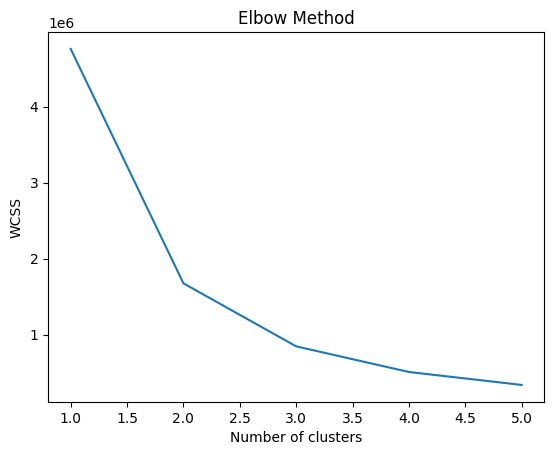

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(cluster[['cltv_c_scaled']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### **K-Means**

In [ ]:
range_n_clusters = [2, 3, 4, 5]
silhouette_scores = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=0)
    kmeans.fit(cluster[['cltv_c_scaled']])

    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(cluster[['cltv_c_scaled']], cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("Untuk n_clusters={0}, skor siluet adalah {1}".format(num_clusters, silhouette_avg))

Untuk n_clusters=2, skor siluet adalah 0.7267416097595947
Untuk n_clusters=3, skor siluet adalah 0.6595950448597371
Untuk n_clusters=4, skor siluet adalah 0.6282048210708144
Untuk n_clusters=5, skor siluet adalah 0.6067338095519194


### **MiniBatch Kmeans**

In [ ]:
range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    # Inisialisasi kmeans
    mb_kmeans = MiniBatchKMeans(n_clusters=num_clusters, max_iter=50)
    mb_kmeans.fit(cluster[['cltv_c_scaled']].to_numpy())

    cluster_labels = mb_kmeans.labels_

    # Skor siluet
    silhouette_avg = silhouette_score(cluster[['cltv_c_scaled']].to_numpy(), cluster_labels)
    print("Untuk n_clusters={0}, skor siluet adalah {1}".format(num_clusters, silhouette_avg))

Untuk n_clusters=2, skor siluet adalah 0.730870951666346
Untuk n_clusters=3, skor siluet adalah 0.6661321094012563
Untuk n_clusters=4, skor siluet adalah 0.6282006731491471
Untuk n_clusters=5, skor siluet adalah 0.5940761615480655


### **Birch**

In [ ]:
range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    # Inisialisasi kmeans
    bisec_kmeans = Birch(n_clusters=num_clusters)
    bisec_kmeans.fit(cluster[['cltv_c_scaled']].to_numpy())

    cluster_labels = bisec_kmeans.labels_

    # Skor siluet
    silhouette_avg = silhouette_score(cluster[['cltv_c_scaled']].to_numpy(), cluster_labels)
    print("Untuk n_clusters={0}, skor siluet adalah {1}".format(num_clusters, silhouette_avg))

Untuk n_clusters=2, skor siluet adalah 0.8467216220317866
Untuk n_clusters=3, skor siluet adalah 0.7472875318522939
Untuk n_clusters=4, skor siluet adalah 0.7466220648004941
Untuk n_clusters=5, skor siluet adalah 0.7185208664678967


Di sini terlihat bahwa 2 adalah yang optimal. Berdasarkan kebutuhan bisnis, kita dapat melanjutkan dengan lebih sedikit atau lebih banyak cluster. Kami akan memilih 3 untuk kasus ini.

In [ ]:
model = Birch(n_clusters = 3)
model.fit(cluster[['cltv_c_scaled']])
labels = model.labels_

In [ ]:
cluster['cluster'] = labels
cluster['cluster'].value_counts()

cluster
2    80694
1     3648
0      189
Name: count, dtype: int64

In [ ]:
cluster.groupby('cluster').agg(['max','min'])['cltv_c_scaled']

max        min
cluster                       
0        100.000000  50.295365
1         50.187798  23.085006
2         23.083763   1.000000

In [ ]:
cluster['cluster'].replace(to_replace=[0,1,2], value = ['very profitable', 'non-profitable', 'profitable'], inplace=True)
cluster.sort_values(by='cltv_c_scaled', ascending=False)

user_id  cltv_c_scaled          cluster
74454  SC3315112001005     100.000000  very profitable
73271  SC1175042004001      90.372598  very profitable
76902  SC3317112008005      82.706493  very profitable
73582  SC3325022010019      79.750669  very profitable
72619  SC1101182007001      78.518729  very profitable
...                ...            ...              ...
39142  SC3312012015004       1.000371       profitable
39259  SC3312132001017       1.000286       profitable
39234  SC3310202014009       1.000250       profitable
37651  SC3307032017015       1.000090       profitable
39283  SC3310212007009       1.000000       profitable

[84531 rows x 3 columns]

In [ ]:
# Gabungkan DataFrame berdasarkan kolom 'cltv_c'
rfm_cltv = pd.merge(rfm_cltv, cluster, on='user_id')
rfm_cltv.head()

user_id  Recency  Frequency    revenue rfm_segment          cltv  \
0  SC9106012011001       15         34  3170500.0   Mid Value  5.944875e+06   
1  SC9106012017001       20         37  1504300.0   Mid Value  1.338308e+06   
2  SC9106011003005       23         36  3273100.0   Mid Value  6.335863e+06   
3  SC9106032003001        8         35   851900.0   Mid Value  4.292047e+05   
4  SC9106202006002       31         34  1307300.0   Mid Value  1.010736e+06   

   cltv_c_scaled_x  cltv_c_scaled_y     cluster  
0         2.950288         2.950288  profitable  
1         1.438960         1.438960  profitable  
2         3.078564         3.078564  profitable  
3         1.140700         1.140700  profitable  
4         1.331490         1.331490  profitable

In [ ]:
rfm_cltv.drop(columns=['cltv_c_scaled_y'], inplace=True)
rfm_cltv.rename(columns={'cltv_c_scaled_x': 'cltv_scaled'}, inplace=True)

In [ ]:
# Kami telah mengelompokkan pelanggan kami ke dalam segmen berdasarkan nilai CLTV (Customer Lifetime Value) yang kami hitung.
rfm_cltv.sort_values(by="cltv_scaled", ascending=False).head()

user_id  Recency  Frequency     revenue rfm_segment  \
74454  SC3315112001005        0         47  22588300.0  High Value   
73271  SC1175042004001       21         46  21461900.0  High Value   
76902  SC3317112008005        2         47  20520800.0  High Value   
73582  SC3325022010019        2         44  20146200.0  High Value   
72619  SC1101182007001       23         41  19988000.0  High Value   

               cltv  cltv_scaled          cluster  
74454  3.017549e+08   100.000000  very profitable  
73271  2.724103e+08    90.372598  very profitable  
76902  2.490438e+08    82.706493  very profitable  
73582  2.400344e+08    79.750669  very profitable  
72619  2.362794e+08    78.518729  very profitable

In [ ]:
rfm_cltv.describe()

Recency     Frequency       revenue          cltv   cltv_scaled
count  84531.000000  84531.000000  8.453100e+04  8.453100e+04  84531.000000
mean      16.421053     23.479374  4.772987e+06  1.865711e+07      7.120935
std       18.199201      6.528003  2.960681e+06  2.287009e+07      7.503247
min        0.000000      1.000000  2.420000e+04  3.463522e+02      1.000000
25%        4.000000     19.000000  2.512000e+06  3.731870e+06      2.224243
50%       11.000000     23.000000  4.272600e+06  1.079622e+07      4.541923
75%       23.000000     28.000000  6.442350e+06  2.454572e+07      9.052878
max      358.000000     56.000000  2.258830e+07  3.017549e+08    100.000000

In [ ]:
# Menghitung rata-rata dari kolom cltv
average_cltv = rfm_cltv['cltv'].mean()

# Menampilkan hasil rata-rata
print("Rata-rata CLTV:", average_cltv)

Rata-rata CLTV: 18657112.703621868


In [ ]:
rfm_cltv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84531 entries, 0 to 84530
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      84531 non-null  object 
 1   Recency      84531 non-null  int64  
 2   Frequency    84531 non-null  int64  
 3   revenue      84531 non-null  float64
 4   rfm_segment  84531 non-null  object 
 5   cltv         84531 non-null  float64
 6   cltv_scaled  84531 non-null  float64
 7   cluster      84531 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 5.2+ MB


In [ ]:
rfm_cltv.rename(columns={'cluster': 'cltv_c_segment'}, inplace=True)

In [ ]:
rfm_cltv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84531 entries, 0 to 84530
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         84531 non-null  object 
 1   Recency         84531 non-null  int64  
 2   Frequency       84531 non-null  int64  
 3   revenue         84531 non-null  float64
 4   rfm_segment     84531 non-null  object 
 5   cltv            84531 non-null  float64
 6   cltv_scaled     84531 non-null  float64
 7   cltv_c_segment  84531 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 5.2+ MB
